<h1 style = "text-align:center">CSE476s - Fundamentals of Big Data Analysis</h1>

# 0. Team Members

| ID      | Name                                      |
|---------|-------------------------------------------|
| 2100631 | Kareem Wael Elhamy                        |
| 2101808 | Azza Hassan Said                          |
| 2100675 | Mohamed Khaled Elsayed Goda               |
| 2100514 | Mohamed Ashraf Mohamed Zakaria Elahmar    |
| 2100902 | Marwan Ahmed Hassen Ali                   |
| 2101629 | Ahmed Haitham Ismail                      |
| 2101080 | Mohamed Essam ElSayed Ahmed               |
| 2100872 | Mentalla Hussein Sedik                    |
| 2101767 | Ahmed Karam Abdel-Hamid Khalafallah       |
| 2100454 | Abdulrahman Salah El-din El-sayed         |

# 1. Project Overview

## 1.1 Description

## Predicting Bank Loan Approvals Using Machine Learning

### Introduction

The paper addresses the **challenge of accurately predicting bank loan approvals** using machine learning techniques. In modern banking, **lending decisions** are critical for both financial institutions and customers, as they directly impact:

- Economic development  
- Financial stability

However, the **loan approval process** is inherently risky due to the possibility of borrower default. Thus, it's essential for banks to assess an applicant's financial position effectively to:

- Minimize risk  
- Optimize decision-making

---

### Limitations of Traditional Methods

Traditional methods typically involve:

- Manual review  
- Basic statistical models

These methods are:

- Inefficient  
- Subjective  
- Prone to errors

With the increasing complexity of financial transactions and a demand for **faster, more accurate decisions**, banks are adopting **data analytics and advanced technologies**.

---

### Machine Learning as a Solution

**Predictive modeling** using machine learning offers a way to:

- Automate the loan approval process  
- Improve decision accuracy

This research explores the application of several machine learning algorithms:

- **Decision Tree**
- **Random Forest**
- **AdaBoosting**
- **Support Vector Machine (SVM)**
- **Gaussian Naive Bayes (GaussianNB)**

---

### Dataset and Objective

- **Dataset size:** 148,670 instances  
- **Attributes:** 37 features per instance  
- **Task:** Classify loan applications as either `"Approved"` or `"Denied"`  
- **Goal:** Identify which algorithm provides the highest accuracy and efficiency

---

### Problem Statement

The research focuses on two core challenges:

1. **Risk Mitigation**  
   - Reliably predict the likelihood of loan repayment  
   - Minimize defaults and financial losses  

2. **Process Optimization**  
   - Automate and streamline loan approval  
   - Ensure speed and consistency without sacrificing accuracy  

---

### Key Findings

- **Ensemble learning methods**, especially **AdaBoosting**, significantly improve predictive performance  
- Achieved **extremely high accuracy**  
- Provides valuable insights for the **adoption of machine learning in the financial sector**


## 1.2 Data Description



The dataset used in the paper is a large, real-world bank loan application dataset sourced from **Kaggle**. It consists of **148,670 instances** and **37 attributes**, providing a comprehensive foundation for predictive modeling in the context of loan approvals.

### Key Characteristics

- **Instances and Features**  
  The dataset includes 148,670 loan applications, each described by 37 features. These features cover demographic information, financial indicators, and loan-specific attributes.

- **Target Variable**  
  A binary outcome: `"Approved"` or `"Denied"`, allowing for classification modeling.

- **Class Distribution**  
  The dataset is imbalanced:  
  - **Approved:** 75.36%  
  - **Denied:** 24.64%

- **Feature Types**  
  Attributes include:
  - **Demographics:** Age, education, family size  
  - **Financial Status:** Income, credit score, mortgage, average credit card spending  
  - **Loan Details:** Loan amount, term  
  - **Banking Behavior:** Securities account, online banking usage, certificate of deposit account

- **Data Preparation**  
  - **Missing Values:** Handled through imputation or removal  
  - **Feature Selection:** Removed non-informative columns (`year`, `Unnamed: 0`, `id`)  
  - **Encoding:** Categorical variables converted to numerical format

- **Exploratory Data Analysis (EDA)**  
  EDA was performed to uncover trends, such as correlations between age and experience, and to visualize class distributions.

### Summary Table

| Property            | Description                                 |
|---------------------|---------------------------------------------|
| Instances           | 148,670                                     |
| Features            | 37 (reduced to 34 after preprocessing)      |
| Target Variable     | Loan Status: "Approved" or "Denied"         |
| Class Distribution  | 75.36% Approved, 24.64% Denied              |
| Data Source         | Kaggle                                      |
| Feature Types       | Demographic, Financial, Loan-specific       |
| Missing Handling    | Imputation or removal                       |
| Feature Selection   | Dropped non-informative columns             |
| Encoding            | Categorical variables encoded numerically   |

This dataset provides a robust foundation for evaluating machine learning algorithms in the context of bank loan approval, supporting the development of accurate and efficient predictive models.


# 2. EDA and Data Preprocessing

## 2.0 Importing Libraries and Dataset

In [64]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay,recall_score, precision_score, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import label_binarize

In [2]:
#Environment Setup
warnings.filterwarnings("ignore")
sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)
%matplotlib inline

## 2.1 Read Data

In [3]:
#Loading the data into the dataframe
df = pd.read_csv("/kaggle/input/loan-data/Loan.csv")

In [4]:
df.head()

,Unnamed: 0,id,year,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,secured_by,total_units,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1,high_interest_rate,senior_age
0,126324,151214,2019,ncf,Male,nopre,type1,p3,l1,nopc,nob/c,986500,4.125,0.6174,9825.00,360.0,neg_amm,not_int,not_lpsm,1408000.0,sb,pr,home,1U,13380.0,CIB,864,EXP,35-44,to_inst,70.063920,North,direct,0,42.0,1,0
1,13385,38275,2019,cf,Joint,nopre,type1,p4,l1,nopc,nob/c,406500,3.625,-0.1990,1100.00,360.0,not_neg,not_int,not_lpsm,1008000.0,sb,pr,home,1U,5640.0,CRIF,505,EXP,>74,not_inst,40.327381,North,direct,0,40.0,0,1
2,98606,123496,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,166500,4.250,0.7779,2379.51,180.0,not_neg,not_int,not_lpsm,338000.0,sb,pr,home,1U,4740.0,CRIF,829,CIB,55-64,to_inst,49.260355,south,direct,0,29.0,1,1
3,7184,32074,2019,cf,Female,nopre,type1,p3,l1,nopc,nob/c,206500,5.625,1.1174,6117.50,360.0,not_neg,not_int,not_lpsm,278000.0,sb,pr,home,1U,3780.0,EXP,763,CIB,35-44,to_inst,74.280576,North,direct,0,44.0,1,0
4,120745,145635,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,166500,3.500,0.1533,779.88,360.0,not_neg,not_int,not_lpsm,168000.0,sb,pr,home,1U,2400.0,CIB,886,CIB,35-44,not_inst,99.107143,North,direct,0,42.0,0,0


In [5]:
df.shape

(148670, 37)

In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'year', 'loan_limit', 'gender', 'approv_in_adv',
       'loan_type', 'loan_purpose', 'credit_worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_rate_spread', 'upfront_charges', 'term', 'neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'income', 'credit_type', 'credit_score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'ltv', 'region', 'security_type',
       'status', 'dtir1', 'high_interest_rate', 'senior_age'],
      dtype='object')

| **Label Name** | **Description**      | **Values**               |
| -------------- | -------------------- | ------------------------ |
| status         | Loan approval status | 0 = approved, 1 = denied |

| **Feature Name**         | **Description**                               |
| ------------------------ | --------------------------------------------- |
| id                       | Loan applicant ID                             |
| loan\_amount             | Loan Amount                                   |
| gender                   | Gender of Loan Applicant                      |
| age                      | Age of Loan Applicant                         |
| income                   | Annual Income of Loan Applicant               |
| region                   | Region of Loan Applicant                      |
| approv\_in\_adv          | Whether the Loan has been Approved in Advance |
| loan\_type               | Type of Loan                                  |
| loan\_purpose            | Purpose of Loan                               |
| business\_or\_commercial | Business Loan or Commercial Loan              |
| rate\_of\_interest       | Loan Interest Rate (NaN if loan not approved) |
| credit\_score            | Applicant's Credit Score                      |


| No. | Question | Answer |
|:---|:---------|:-------|
| 1 | cf and ncf in 'loan_limit' | **cf** = Conforming loan; **ncf** = Non-conforming loan (jumbo loan) |
| 2 | joint in 'gender' | Joint application by two borrowers together |
| 3 | Different types of loan | type1: Conventional, type2: Government-backed (e.g., FHA/VA), type3: Other specialized loans |
| 4 | Good/Bad credit score | Excellent: 750-850, Good: 700-749, Fair: 650-699, Poor: 550-649, Bad: below 550 |
| 5 | Open credit line | Revolving credit account (like credit card or credit line) |
| 6 | neg_ammortization | Loan balance grows because payments are less than interest owed |
| 7 | Interest-only loan | Paying only interest for some time; principal later |
| 8 | Lump sum | A single large payment instead of regular small payments |
| 9 | Site Built vs Manufactured Home | Site Built: built on site; Manufactured: built in factory and transported |
| 10 | occupancy_type | pr: Primary Residence, sr: Second Residence, ir: Investment Residence |
| 11 | Secured_by 'collateral type' | home: house is collateral; land: land is collateral |
| 12 | Co-applicant | Second person applying for the loan with the applicant |
| 13 | CIB and EXP in credit_type | CIB: Credit Information Bureau; EXP: Experian (credit agency) |
| 14 | Other ways besides institution | to_inst: direct to institution; not_inst: through third-party or broker |
| 15 | Direct and Indirect security_type | Direct: lender holds the lien directly; Indirect: through third party |
| 16 | Senior citizen | Someone aged 62 years or older |


## 2.2 Data Cleaning


In [7]:
df.isna().sum()

Unnamed: 0                       0
id                               0
year                             0
loan_limit                    3344
gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
credit_worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest                 0
interest_rate_spread         36639
upfront_charges              39642
term                            41
neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
secured_by                       0
total_units                      0
income                        9150
credit_type                      0
credit_score                     0
co-applicant_credit_type         0
age                 

In [8]:
df.describe()

,Unnamed: 0,id,year,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,ltv,status,dtir1,high_interest_rate,senior_age
count,148670.000000,148670.000000,148670.0,1.486700e+05,148670.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000,148670.000000,148670.000000
mean,74334.500000,99224.500000,2019.0,3.311177e+05,2.808830,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932,0.333685,0.406625
std,42917.476598,42917.476598,0.0,1.839093e+05,2.224437,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435,0.471530,0.491205
min,0.000000,24890.000000,2019.0,1.650000e+04,-1.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000,0.000000,0.000000
25%,37167.250000,62057.250000,2019.0,1.965000e+05,2.750000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000,0.000000,0.000000
50%,74334.500000,99224.500000,2019.0,2.965000e+05,3.750000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000,0.000000,0.000000
75%,111501.750000,136391.750000,2019.0,4.365000e+05,4.250000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000,1.000000,1.000000
max,148669.000000,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000,1.000000,1.000000


In [9]:
col_names=df.columns
for col in col_names:
    print(df.loc[:,col].value_counts())
    print((df.loc[:,col].value_counts()).shape)
    print("---------------------------------")
    print("\n\n")

Unnamed: 0
126324    1
146672    1
32830     1
127013    1
18172     1
         ..
23270     1
128784    1
37618     1
45692     1
83945     1
Name: count, Length: 148670, dtype: int64
(148670,)
---------------------------------



id
151214    1
171562    1
57720     1
151903    1
43062     1
         ..
48160     1
153674    1
62508     1
70582     1
108835    1
Name: count, Length: 148670, dtype: int64
(148670,)
---------------------------------



year
2019    148670
Name: count, dtype: int64
(1,)
---------------------------------



loan_limit
cf     135348
ncf      9978
Name: count, dtype: int64
(2,)
---------------------------------



gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64
(4,)
---------------------------------



approv_in_adv
nopre    124621
pre       23141
Name: count, dtype: int64
(2,)
---------------------------------



loan_type
type1    113173
type2     20762
type3     

In [10]:
df.duplicated().sum()

0

#### Drop unnecessary columns "'Unnamed: 0','id','year'" 

In [11]:
df.drop(columns=['Unnamed: 0','id','year'],inplace=True)
df.columns

Index(['loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'credit_worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'interest_rate_spread',
       'upfront_charges', 'term', 'neg_ammortization', 'interest_only',
       'lump_sum_payment', 'property_value', 'construction_type',
       'occupancy_type', 'secured_by', 'total_units', 'income', 'credit_type',
       'credit_score', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'ltv', 'region', 'security_type', 'status',
       'dtir1', 'high_interest_rate', 'senior_age'],
      dtype='object')

### Handle Categorical NULLs

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   gender                     148670 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   credit_worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   loan_amount                148670 non-null  int64  
 9   rate_of_interest           148670 non-null  float64
 10  interest_rate_spread       112031 non-null  float64
 11  upfront_charges            109028 non-null  float64
 12  term                       148629 non-null  float64
 13  neg_ammortization          14

In [13]:
df.isna().sum()

loan_limit                    3344
gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
credit_worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest                 0
interest_rate_spread         36639
upfront_charges              39642
term                            41
neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
secured_by                       0
total_units                      0
income                        9150
credit_type                      0
credit_score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
ltv                          15098
region              

In [14]:
cat_features=df.select_dtypes(include=['object','category']).columns
cat_features

Index(['loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'credit_worthiness', 'open_credit', 'business_or_commercial',
       'neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'region', 'security_type'],
      dtype='object')

In [15]:
# Handling missing values in categorical values
for cal in cat_features:
    df[cal].fillna(df[cal].mode()[0],inplace=True)

    
df.isna().sum() 

loan_limit                       0
gender                           0
approv_in_adv                    0
loan_type                        0
loan_purpose                     0
credit_worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest                 0
interest_rate_spread         36639
upfront_charges              39642
term                            41
neg_ammortization                0
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
secured_by                       0
total_units                      0
income                        9150
credit_type                      0
credit_score                     0
co-applicant_credit_type         0
age                              0
submission_of_application        0
ltv                          15098
region              

### Handling Numerical Nulls

In [16]:
# Get the columns of the numerical values

num_features=df.select_dtypes(include =['int64','float64']).columns
num_features

Index(['loan_amount', 'rate_of_interest', 'interest_rate_spread',
       'upfront_charges', 'term', 'property_value', 'income', 'credit_score',
       'ltv', 'status', 'dtir1', 'high_interest_rate', 'senior_age'],
      dtype='object')

In [17]:
df.describe()

,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,ltv,status,dtir1,high_interest_rate,senior_age
count,1.486700e+05,148670.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000,148670.000000,148670.000000
mean,3.311177e+05,2.808830,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932,0.333685,0.406625
std,1.839093e+05,2.224437,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435,0.471530,0.491205
min,1.650000e+04,-1.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000,0.000000,0.000000
25%,1.965000e+05,2.750000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000,0.000000,0.000000
50%,2.965000e+05,3.750000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000,0.000000,0.000000
75%,4.365000e+05,4.250000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000,1.000000,1.000000
max,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000,1.000000,1.000000


In [18]:
# Count negative values in the interest_rate_spread column
negative_count = (df['interest_rate_spread'] < 0).sum()

print(f"Number of records with negative interest_rate_spread: {negative_count}")

Number of records with negative interest_rate_spread: 21883


In [19]:
# Handling missing values in numerical values
for num in num_features:
    df[num].fillna(df[num].mean(),inplace=True)

df.isna().sum() 

loan_limit                   0
gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
credit_worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
interest_rate_spread         0
upfront_charges              0
term                         0
neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
secured_by                   0
total_units                  0
income                       0
credit_type                  0
credit_score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
ltv                          0
region                       0
security_type                0
status                       0
dtir1                        0
high_int

In [20]:
## For Column 'rate_of_interest'

# Calculate mean excluding -1
valid_mean = df.loc[df['rate_of_interest'] != -1, 'rate_of_interest'].mean()

# Replace -1 with the calculated mean
df['rate_of_interest'] = df['rate_of_interest'].replace(-1, valid_mean)


In [21]:
df.describe()

,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,ltv,status,dtir1,high_interest_rate,senior_age
count,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000
mean,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932,0.333685,0.406625
std,1.839093e+05,0.487764,0.445359,2784.133285,58.401029,3.411696e+05,6293.492004,115.875857,37.883839,0.430942,9.652119,0.471530,0.491205
min,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000,0.000000,0.000000
25%,1.965000e+05,3.750000,0.181500,1250.000000,360.000000,2.880000e+05,3840.000000,599.000000,63.297872,0.000000,33.000000,0.000000,0.000000
50%,2.965000e+05,4.045476,0.441656,3224.996127,360.000000,4.580000e+05,6000.000000,699.000000,73.026316,0.000000,37.732932,0.000000,0.000000
75%,4.365000e+05,4.250000,0.620000,3889.495000,360.000000,5.980000e+05,8280.000000,800.000000,84.722222,0.000000,44.000000,1.000000,1.000000
max,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000,1.000000,1.000000


## 2.3 Visualization

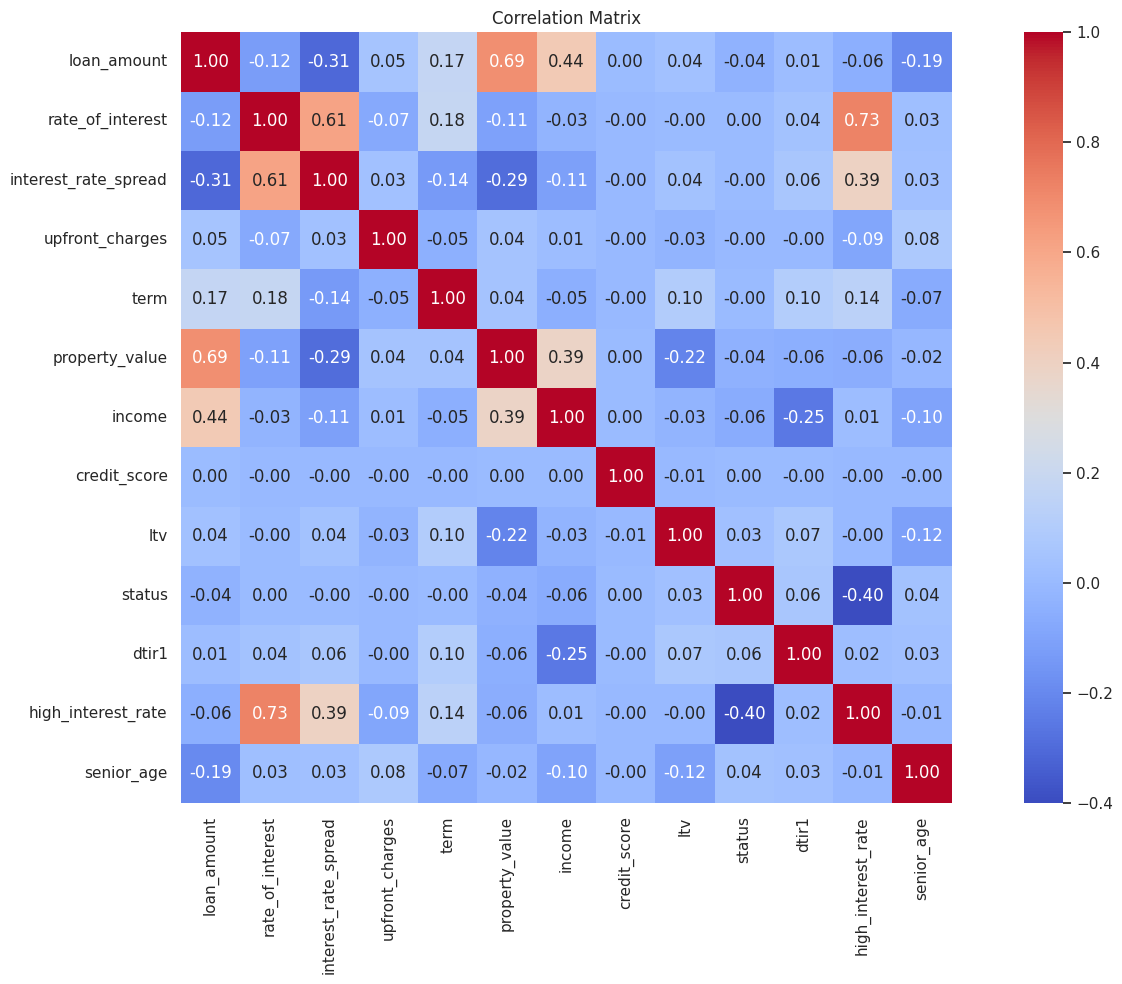

In [22]:
# Assuming df is your preprocessed DataFrame with only numerical columns

# Compute correlation matrix
corr_matrix = df[num_features].corr()

# Display as a heatmap
plt.figure(figsize=(15, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


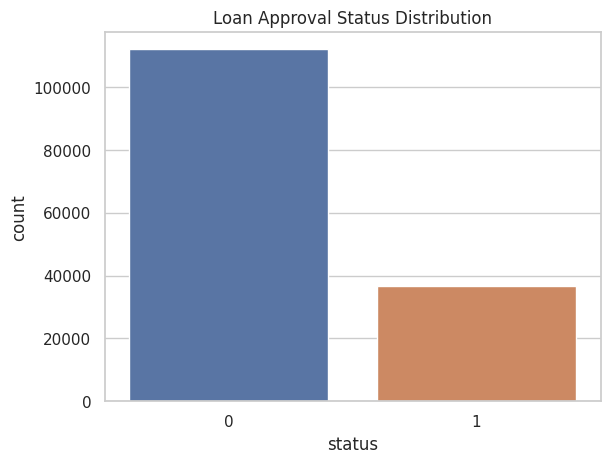

In [23]:
sns.countplot(data=df, x='status')
plt.title("Loan Approval Status Distribution")
plt.show()

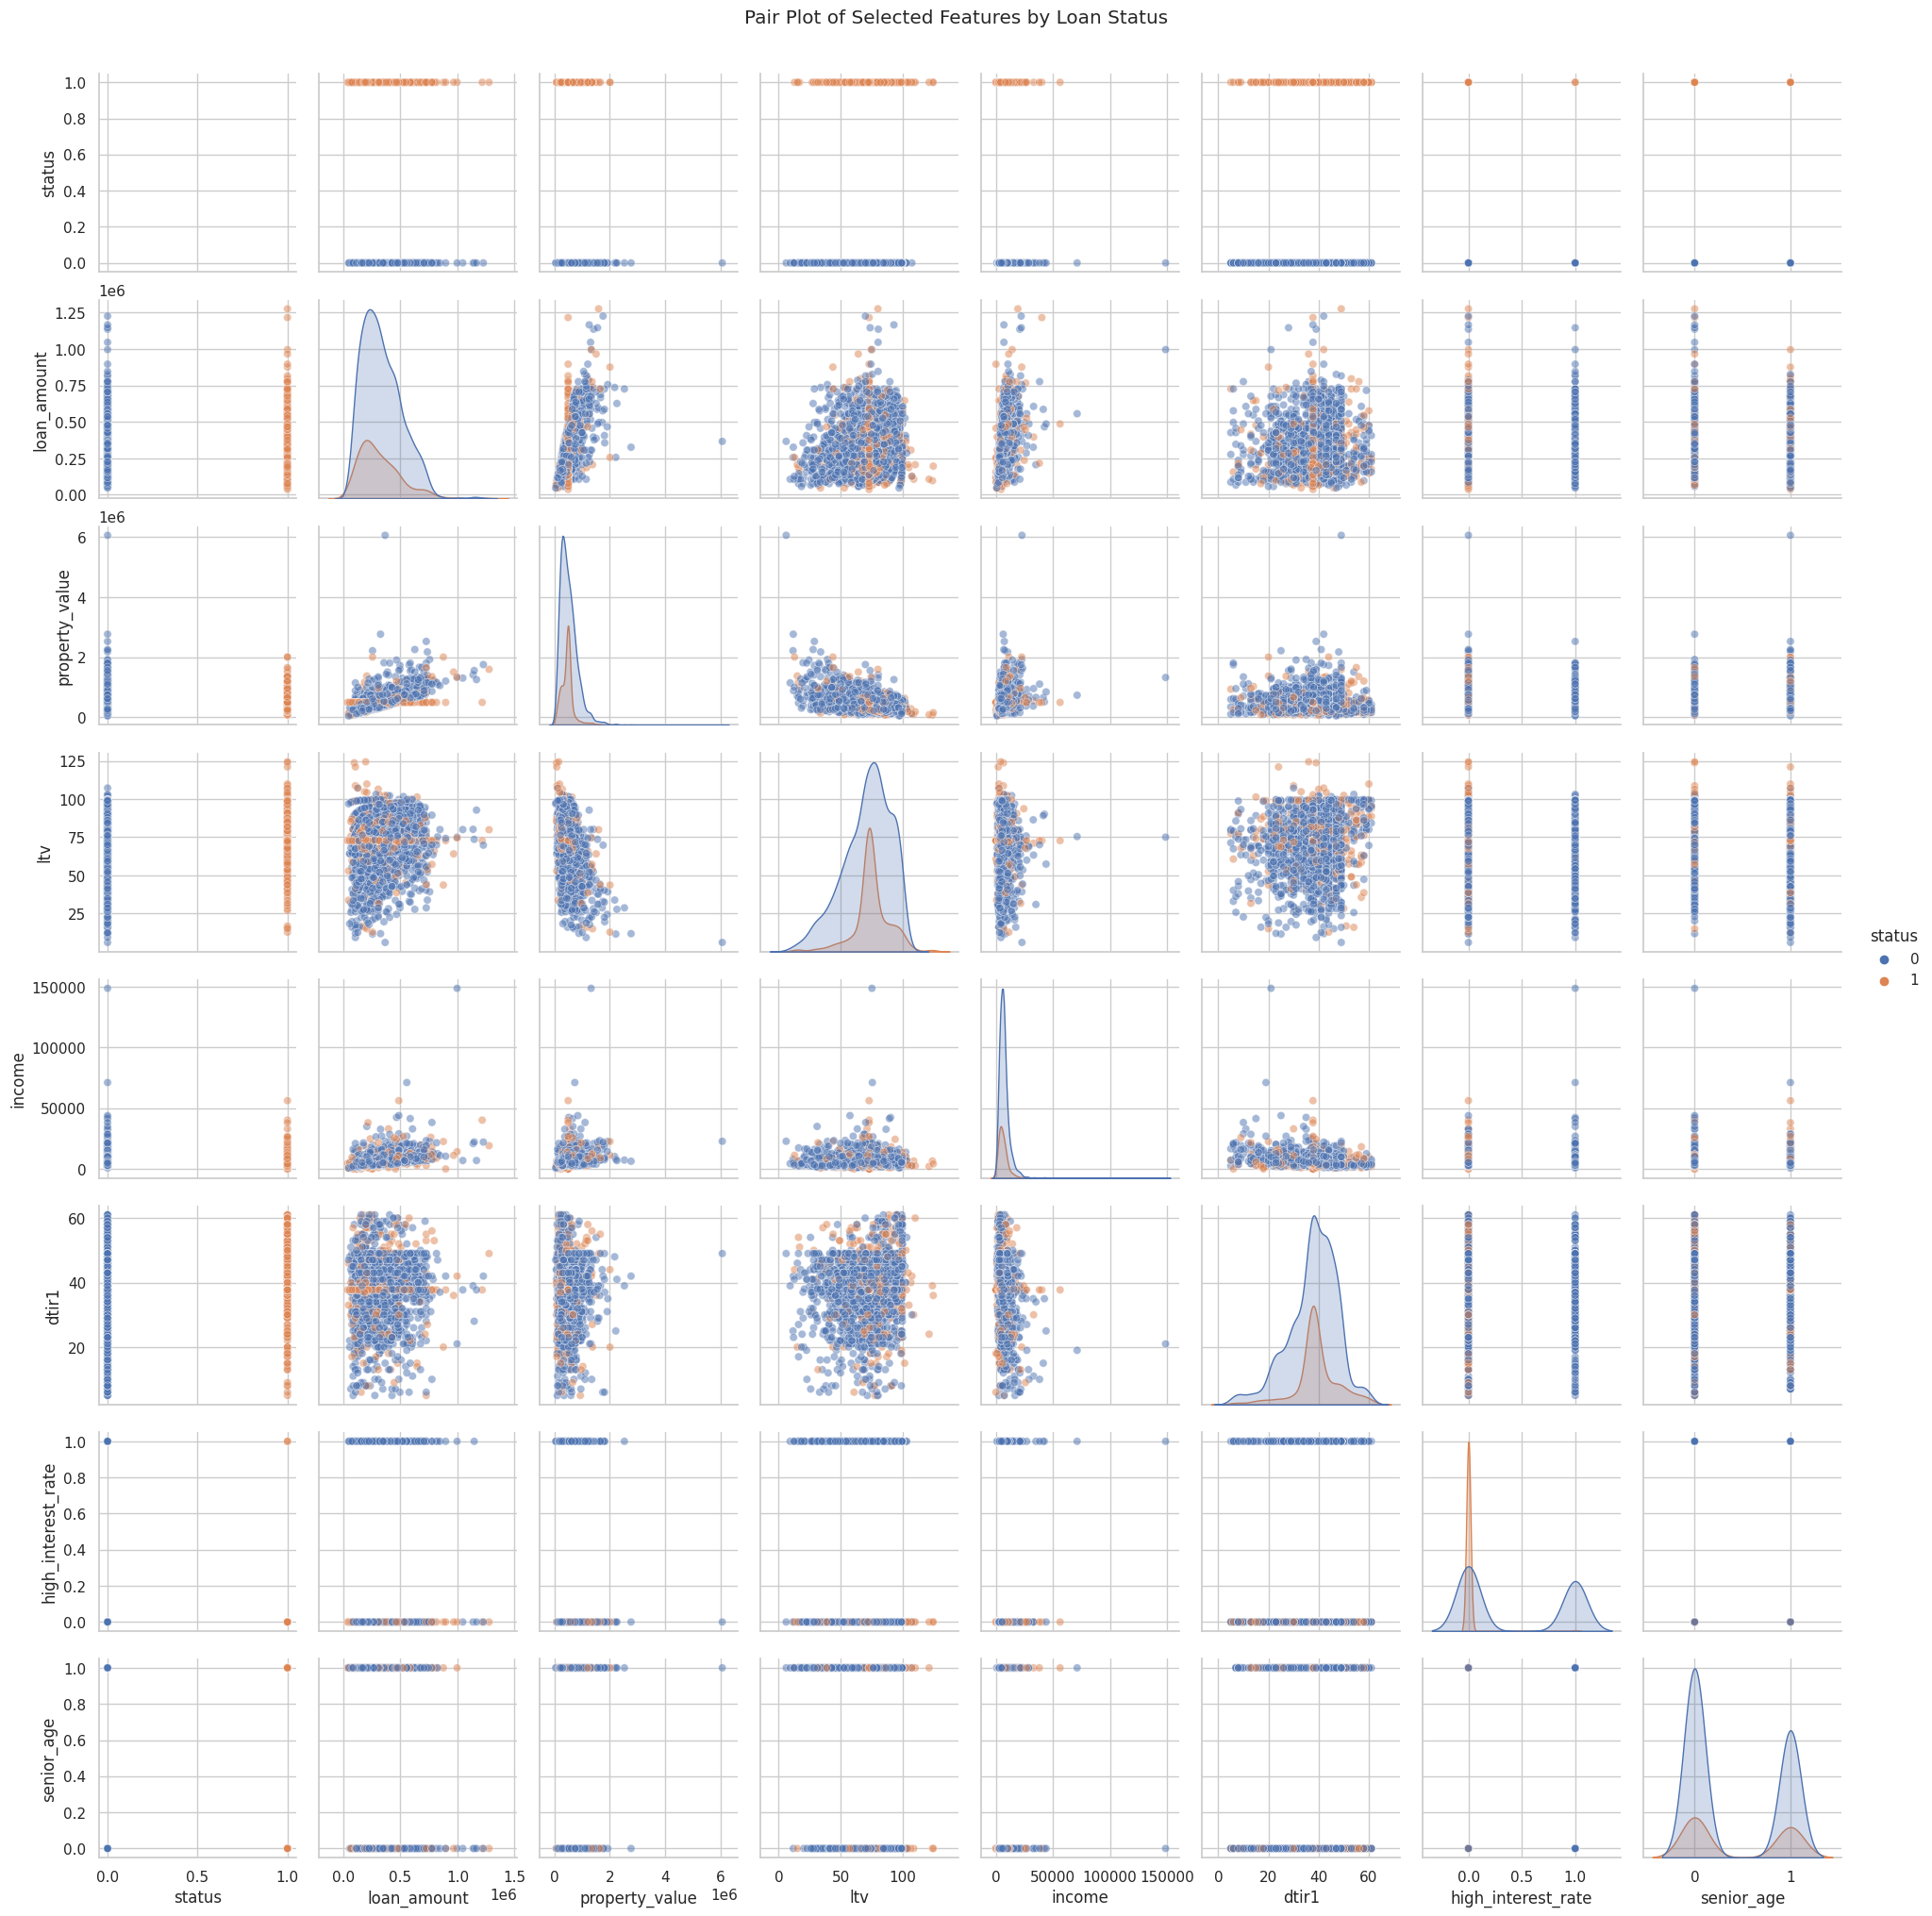

In [24]:
sample_df = df.sample(n=2000, random_state=42)  # Reduce size for speed
sns.pairplot(sample_df, vars=['status', 'loan_amount', 'property_value', 'ltv', 'income', 'dtir1', 'high_interest_rate', 'senior_age'], hue='status', plot_kws={'alpha':0.5})
plt.suptitle("Pair Plot of Selected Features by Loan Status", y=1.02)
plt.show()


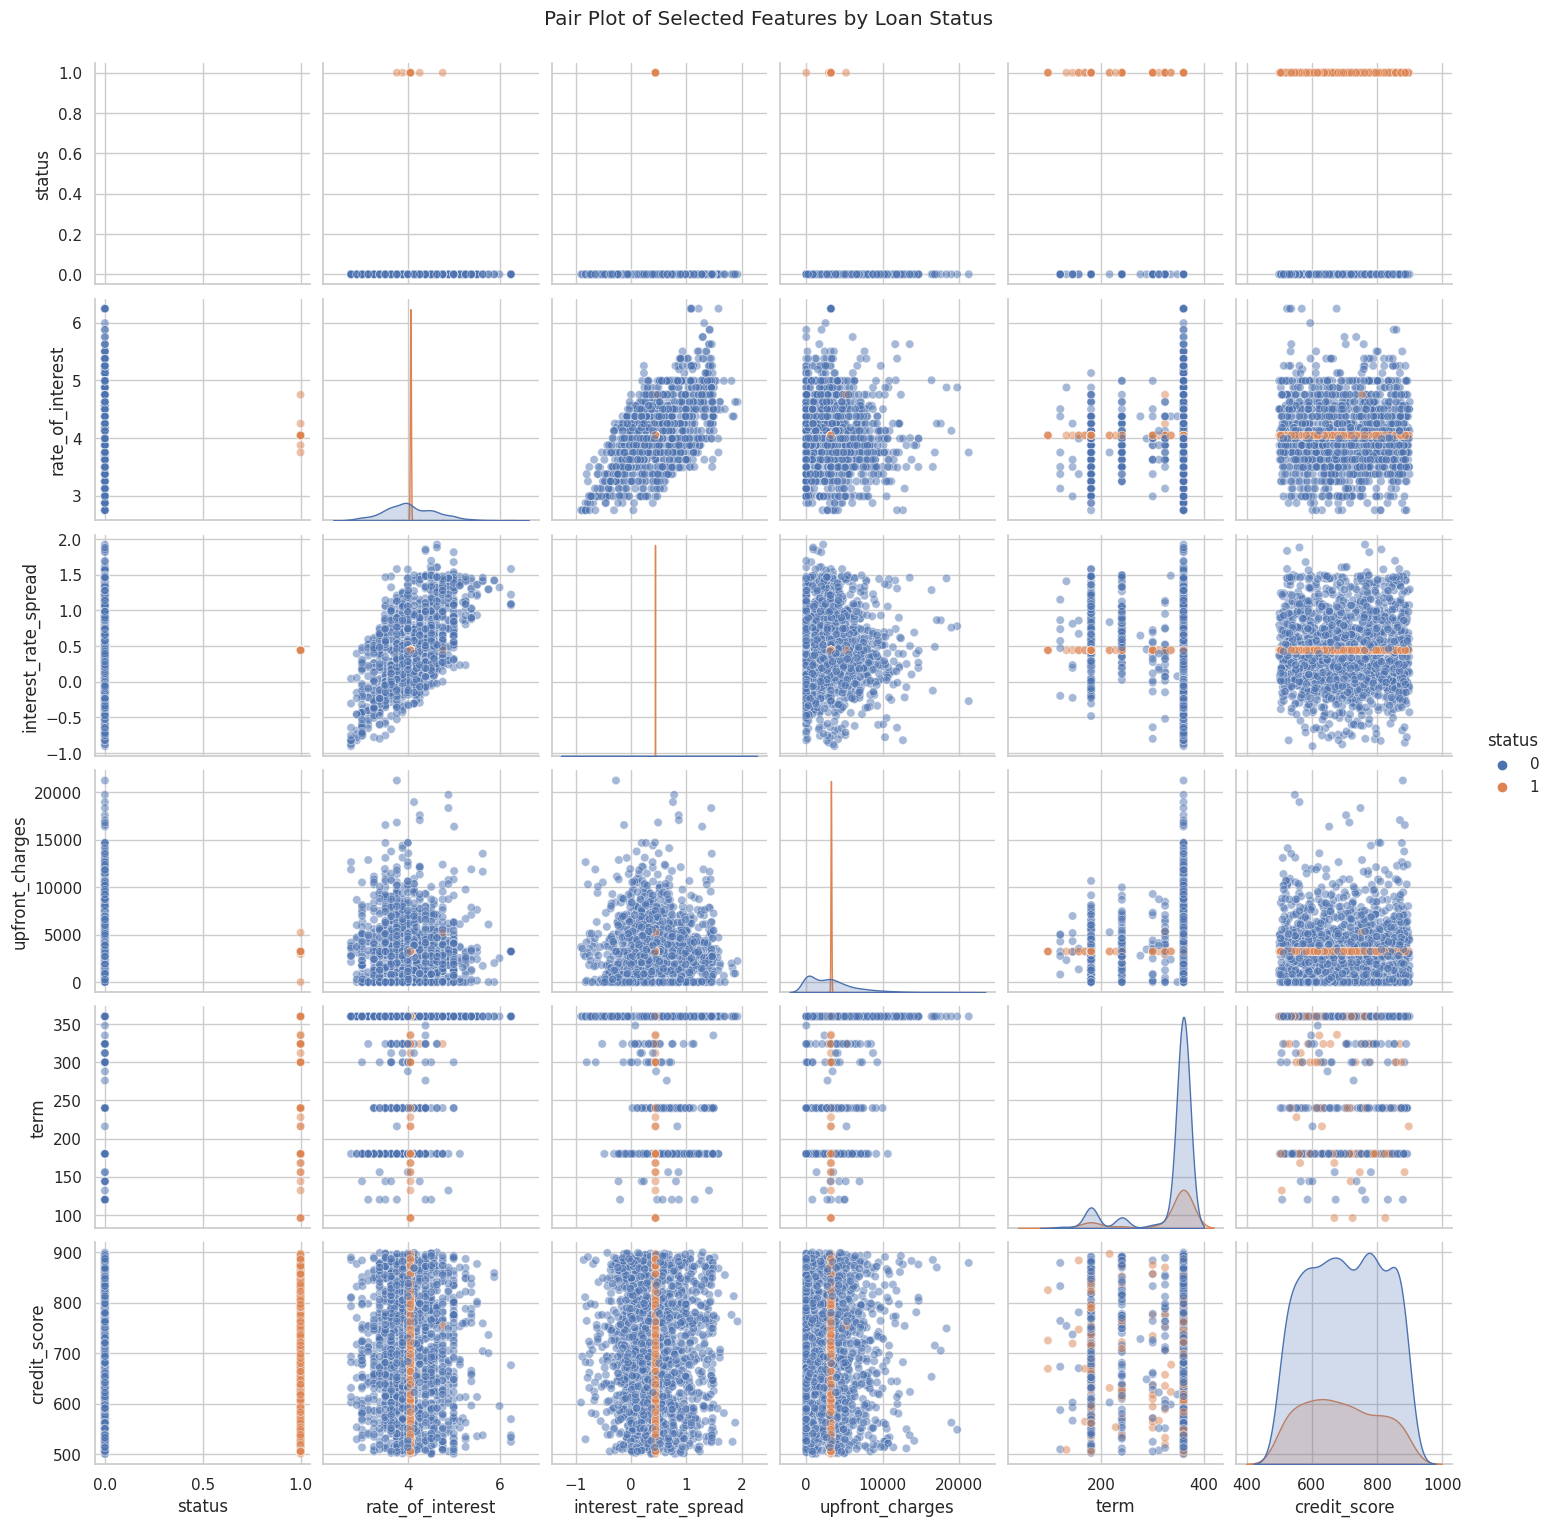

In [25]:
sample_df = df.sample(n=2000, random_state=42)  # Reduce size for speed
sns.pairplot(sample_df, vars=['status', 'rate_of_interest', 'interest_rate_spread', 'upfront_charges', 'term', 'credit_score'], hue='status', plot_kws={'alpha':0.5})
plt.suptitle("Pair Plot of Selected Features by Loan Status", y=1.02)
plt.show()


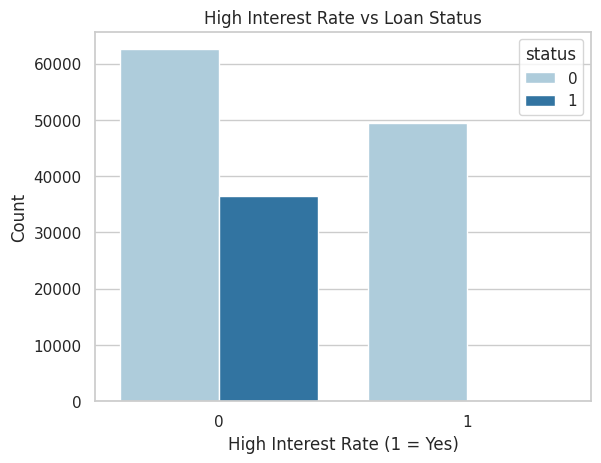

In [26]:
sns.countplot(data=df, x='high_interest_rate', hue='status', palette='Paired')
plt.title('High Interest Rate vs Loan Status')
plt.xlabel('High Interest Rate (1 = Yes)')
plt.ylabel('Count')
plt.show()


In [27]:
# Filter for high_interest_rate == 1 and status == 'Approved'
high_interest_approved = df[(df['high_interest_rate'] == 1) & (df['status'] == 1)]

# Count the rows
count = high_interest_approved.shape[0]

print(f"Number of cases where high_interest_rate is 1 and status is 'Approved': {count}")


Number of cases where high_interest_rate is 1 and status is 'Approved': 130


### Correlation Formula

The **Pearson correlation coefficient** (often referred to as just "correlation") is a measure of the linear relationship between two variables. The formula to calculate the Pearson correlation coefficient \( r \) is:

$$
r = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum{(x_i - \bar{x})^2} \sum{(y_i - \bar{y})^2}}}
$$

Where:
- \( r \) is the Pearson correlation coefficient.
- \( x_i \) and \( y_i \) are individual data points from two variables \( X \) and \( Y \).
- \( \bar{x} \) and \( \bar{y} \) are the means of the variables \( X \) and \( Y \), respectively.
- The sums are taken over all data points in the dataset.

#### Interpretation of Pearson's \( r \):
- \( r = 1 \): Perfect positive correlation.
- \( r = 0 \): No correlation.
- \( r = -1 \): Perfect negative correlation.
- \( 0 < r < 1 \): Positive correlation (as one variable increases, the other also increases).
- \( -1 < r < 0 \): Negative correlation (as one variable increases, the other decreases).

#### Assumptions:
- The relationship between the variables is linear.
- Both variables should be continuous.
- No significant outliers should be present.


###  Contingency Table (Crosstab) Summary

A **contingency table** (or **crosstab**) is a two-dimensional table that displays the frequency distribution of two categorical variables. It helps analyze the **relationship** between these variables — especially useful when working with binary or categorical features.



In [28]:
pd.crosstab(df['high_interest_rate'], df['status'], normalize='index') * 100


status,0,1
high_interest_rate,,
0,63.144931,36.855069
1,99.737951,0.262049


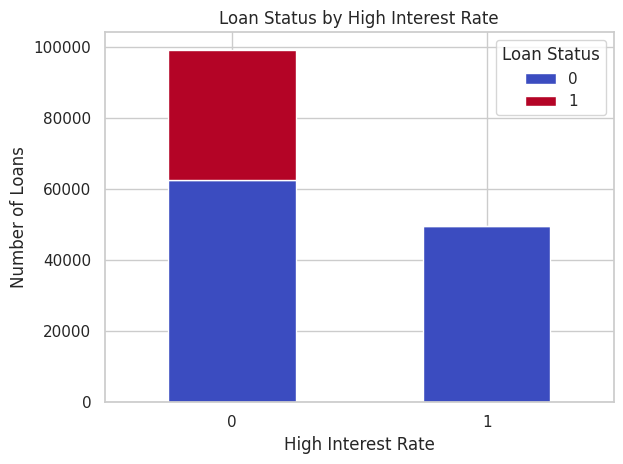

In [29]:
# Crosstab
ct = pd.crosstab(df['high_interest_rate'], df['status'])

# Plot
ct.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Loan Status by High Interest Rate')
plt.xlabel('High Interest Rate')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Time for cat_features

In [30]:
cat_features

Index(['loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'credit_worthiness', 'open_credit', 'business_or_commercial',
       'neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'region', 'security_type'],
      dtype='object')

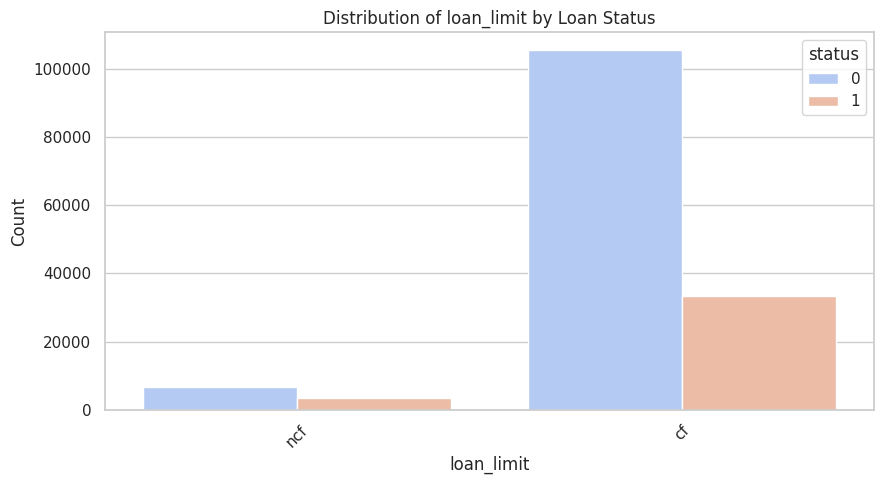

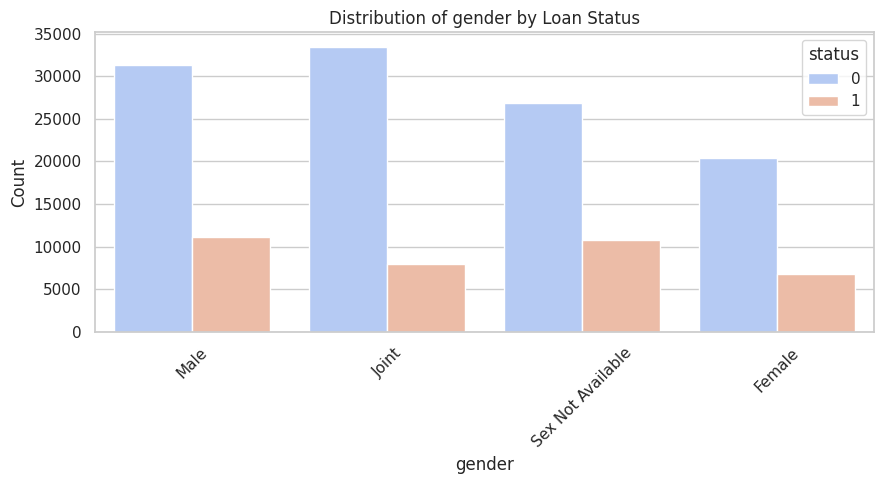

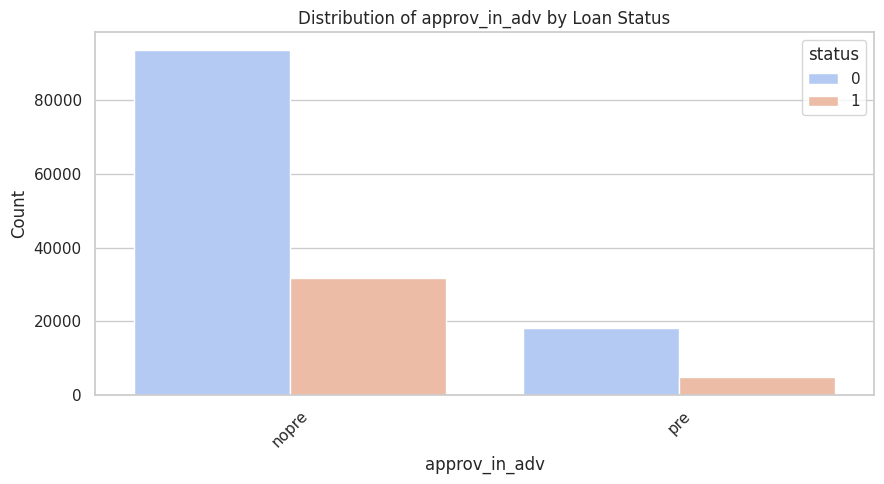

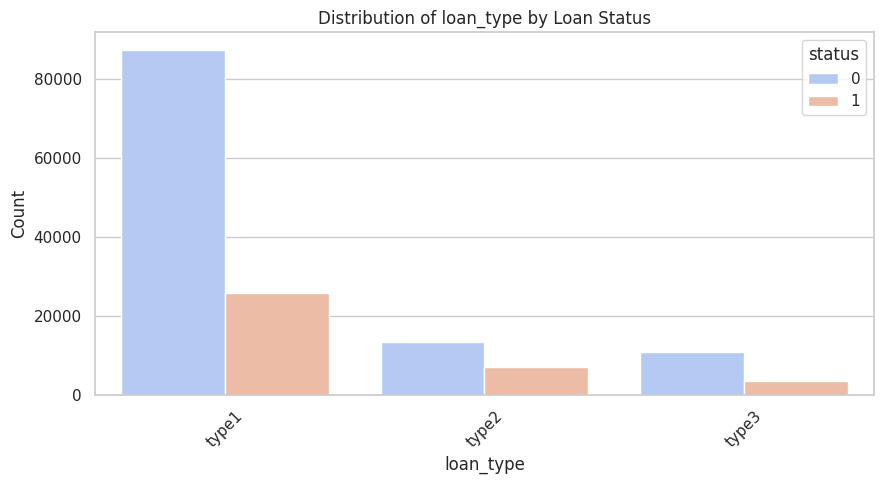

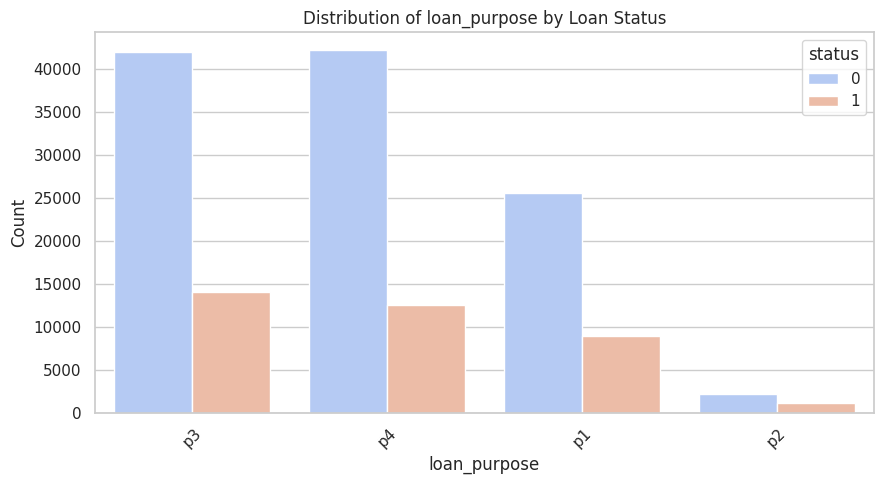

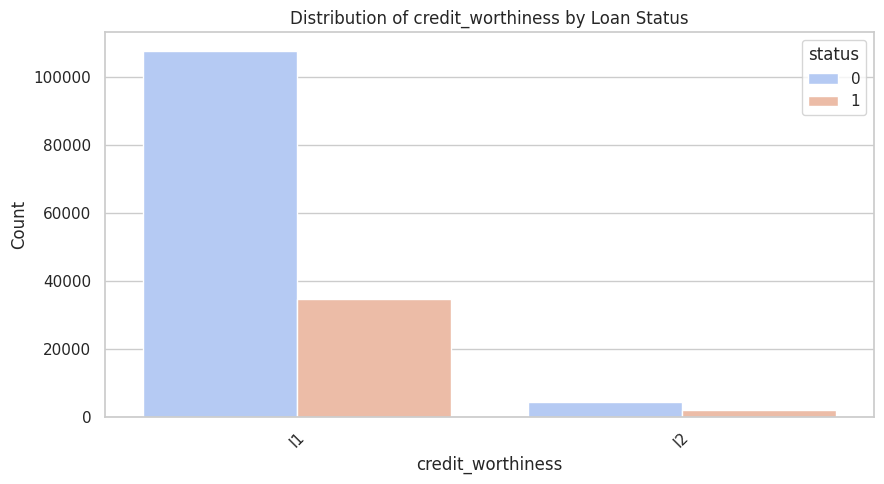

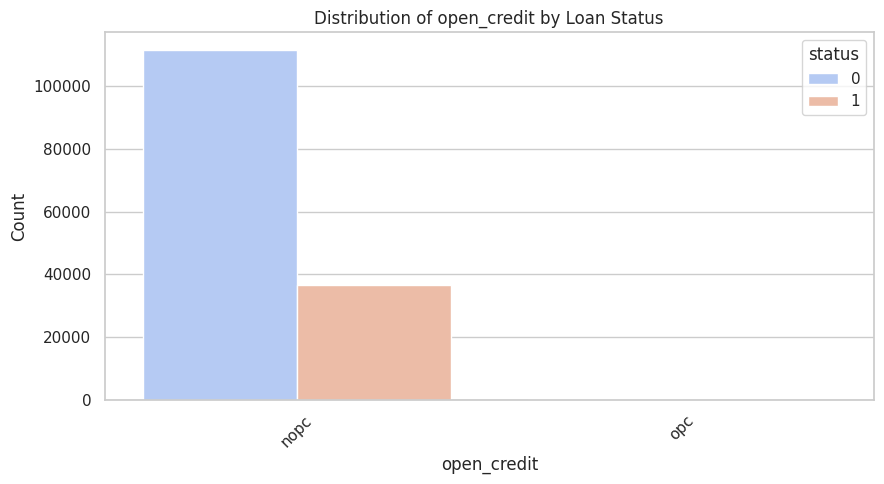

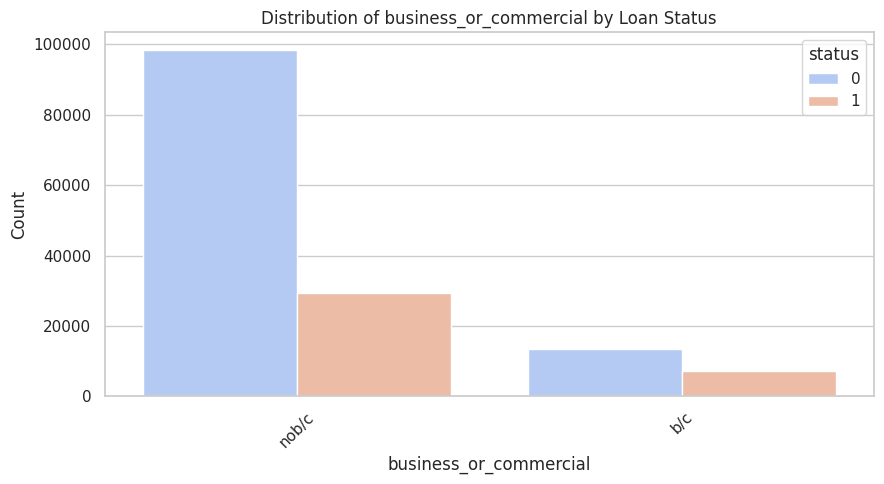

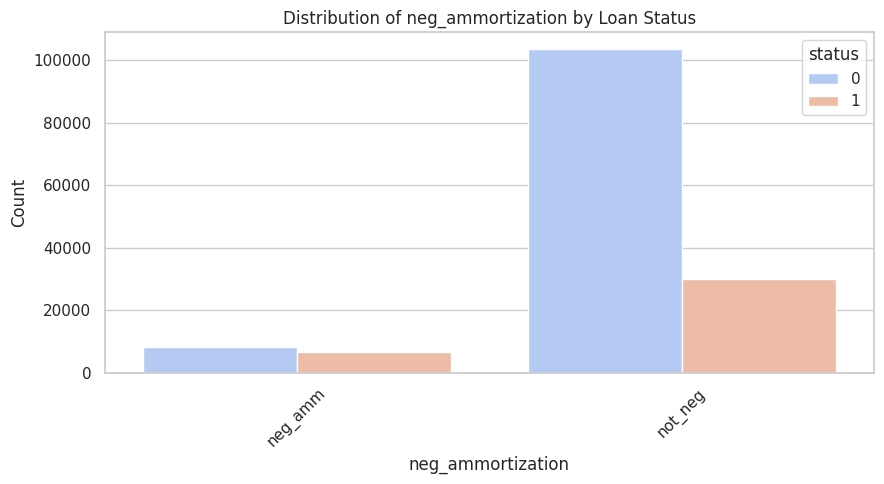

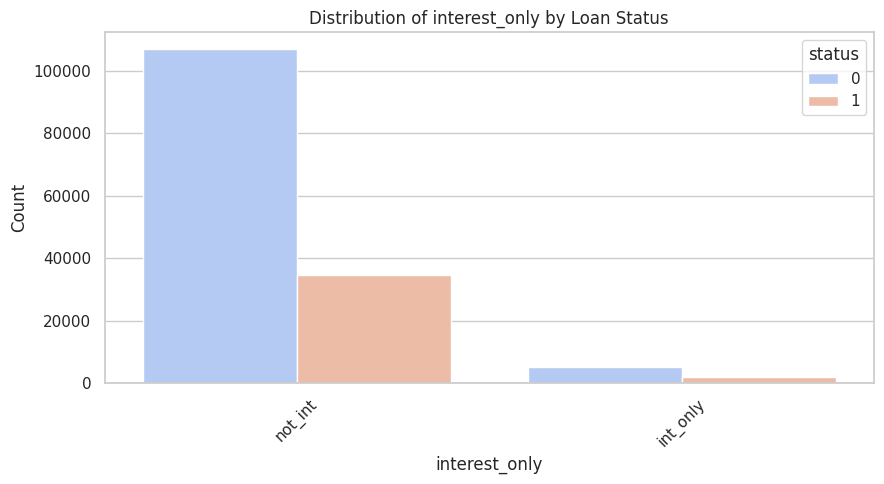

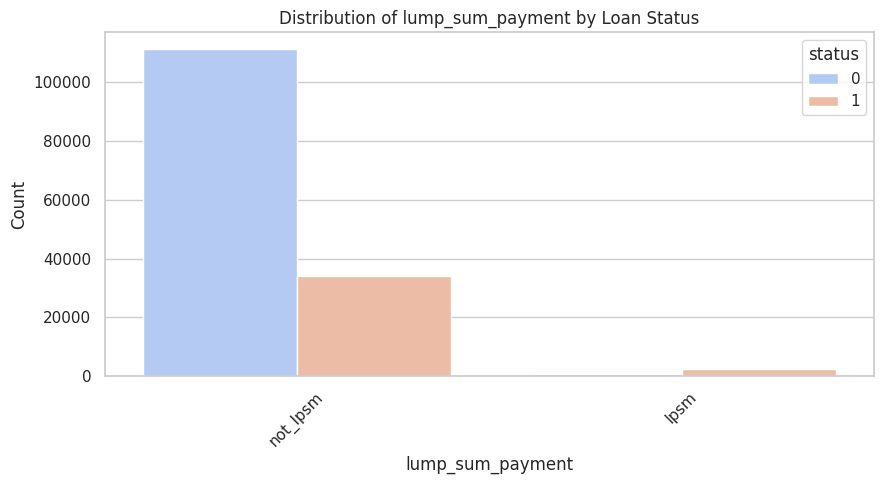

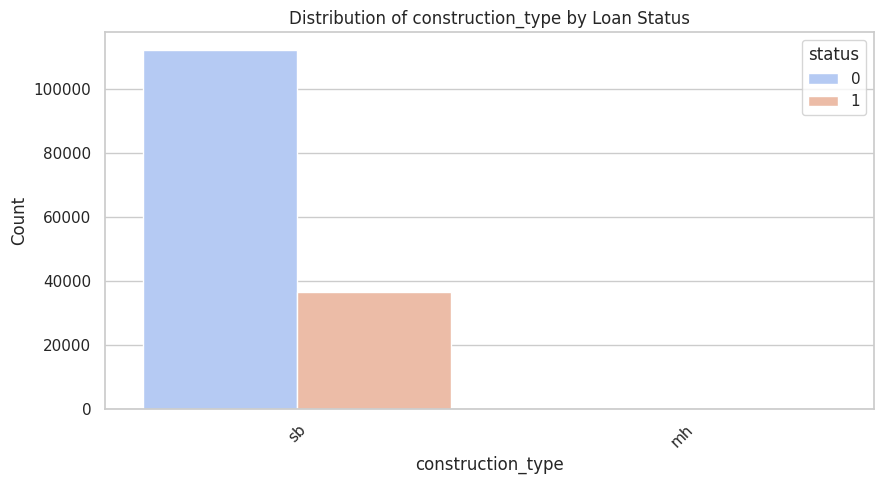

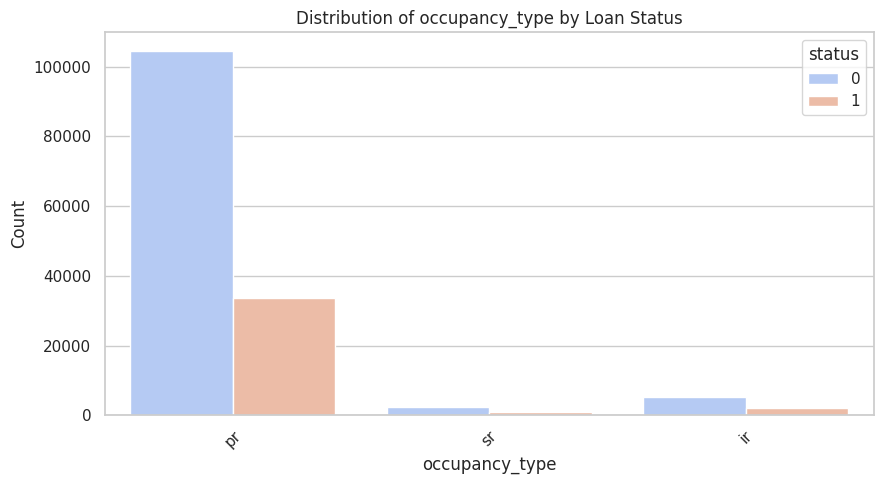

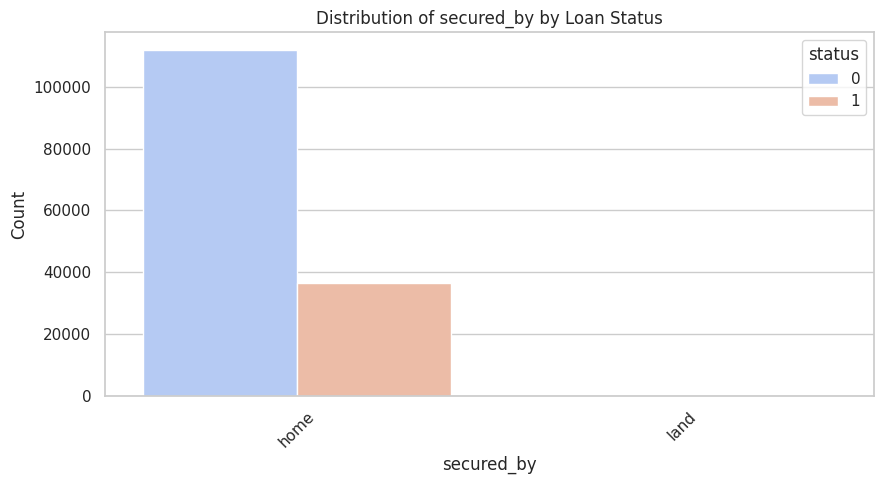

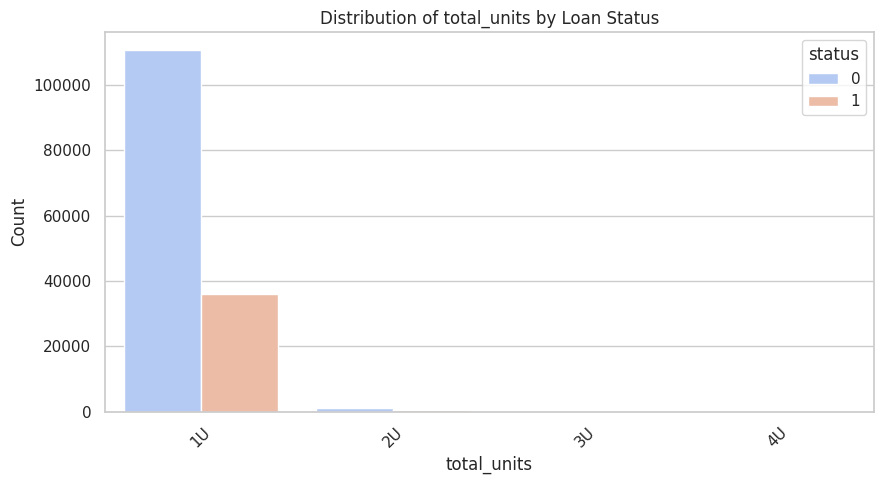

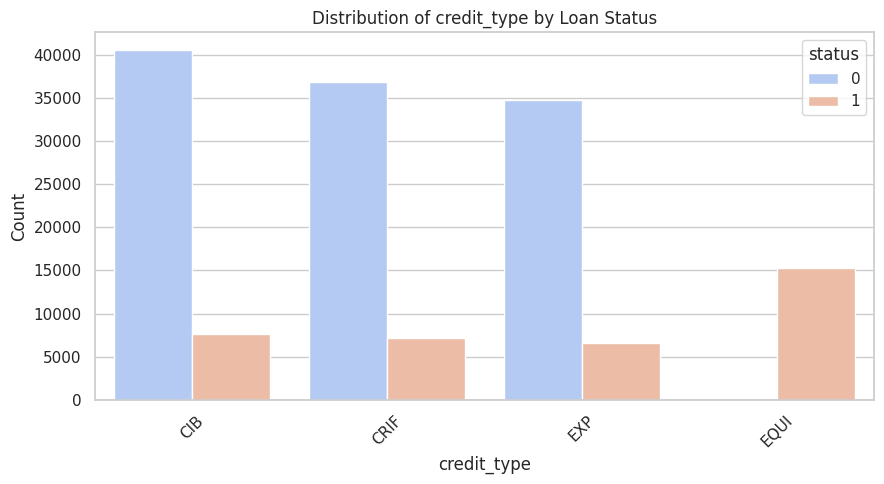

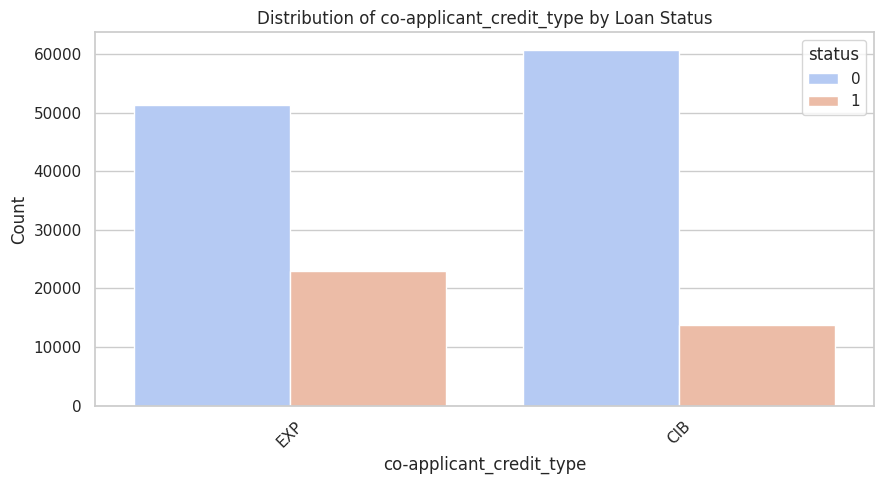

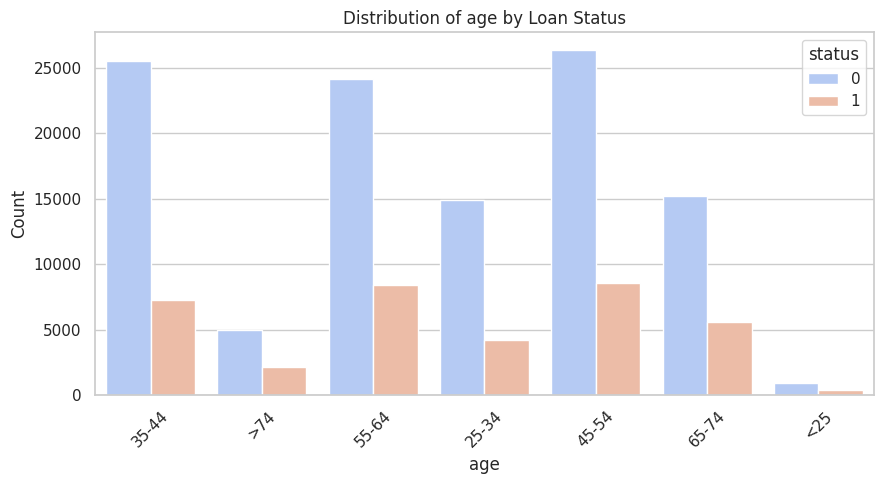

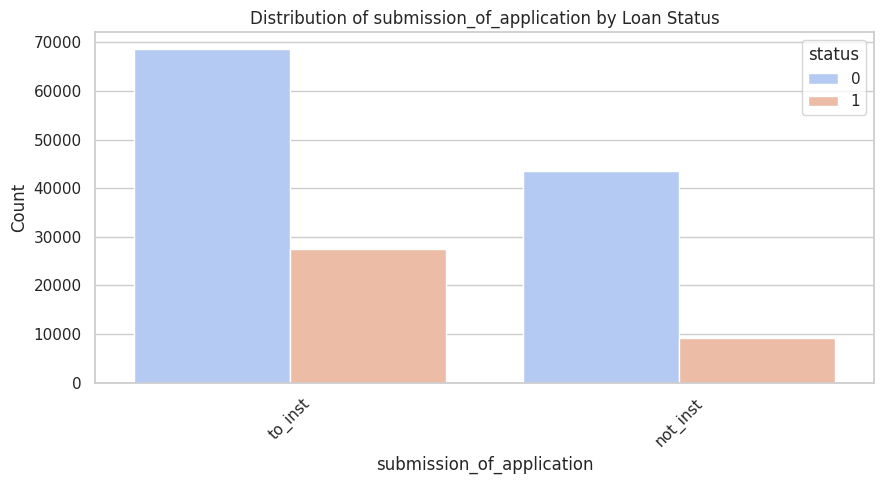

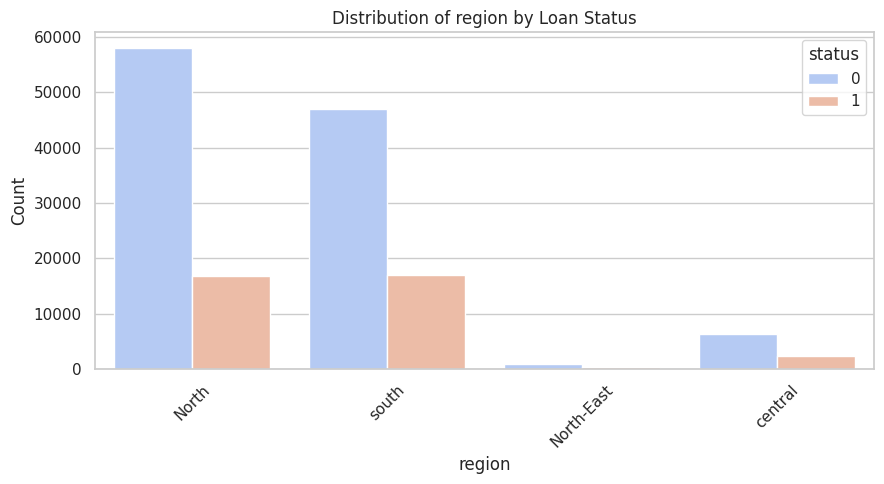

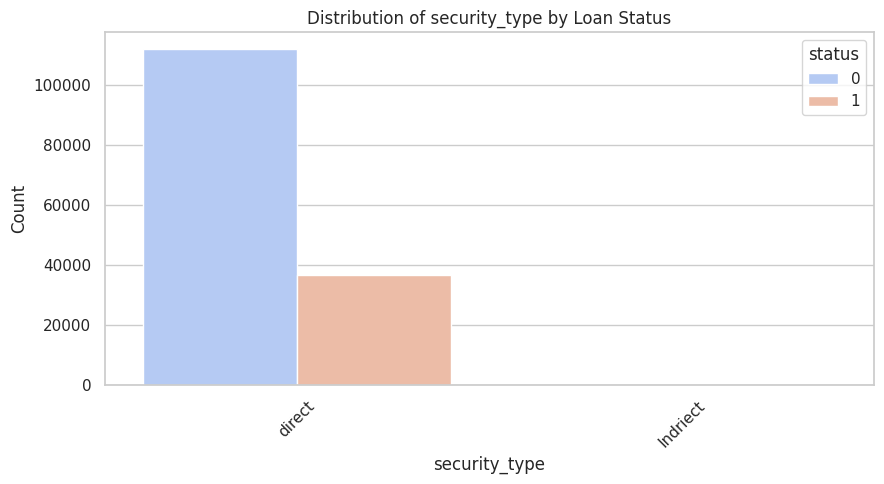

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = [
    'loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
    'credit_worthiness', 'open_credit', 'business_or_commercial',
    'neg_ammortization', 'interest_only', 'lump_sum_payment',
    'construction_type', 'occupancy_type', 'secured_by', 'total_units',
    'credit_type', 'co-applicant_credit_type', 'age',
    'submission_of_application', 'region', 'security_type'
]

# Plotting bar plots for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(9, 5))
    sns.countplot(data=df, x=feature, hue='status', palette='coolwarm')
    plt.title(f'Distribution of {feature} by Loan Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## 2.4 Cleaning Approach Crossroards

**From this point, there are two approaches to data cleaning:**
- **Research paper aporoach**: continue with all attributes even the low correlation ones.
- **Our approach**: drop the low correlation features + `secured_by`

### 2.4.1 Research Paper Approach

#### Final List of Preprocessing Decisions

##### **Label Encoding**
- `loan_limit` → [0, 1]
- `approv_in_adv` → [0, 1]
- `credit_worthiness` → [0, 1]
- `open_credit` → [0, 1]
- `business_or_commercial` → [0, 1]
- `neg_ammortization` → [0, 1]
- `interest_only` → [0, 1]
- `lump_sum_payment` → [0, 1]
- `submission_of_application` → [0, 1]
- `security_type` → [0, 1]
- `age` → [1, 2, 3, 4, 5]
- `total_units` → [1, 2, 3, 4]
- `seured_by` → [0, 1]

##### **One Hot Encoding**
- `gender`
- `construction_type`
- `occupancy_type`
- `credit_type`
- `co-applicant_credit_type`
- `region`
- `high_interest_rate`
- `senior_age`
- `loan_type`
- `loan_purpose`


In [32]:
cat_features

Index(['loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'credit_worthiness', 'open_credit', 'business_or_commercial',
       'neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'region', 'security_type'],
      dtype='object')

| Feature                      | Encoding Type     | Mapping / Notes                                                                 |
|-----------------------------|-------------------|----------------------------------------------------------------------------------|
| loan_limit                  | Label Encoding     | cf → 0, ncf → 1                                                                 |
| approv_in_adv              | Label Encoding     | nopre → 0, pre → 1                                                              |
| credit_worthiness          | Label Encoding     | l1 → 0, l2 → 1                                                                  |
| open_credit                | Label Encoding     | nopc → 0, opc → 1                                                               |
| business_or_commercial     | Label Encoding     | nob/c → 0, b/c → 1                                                              |
| neg_ammortization          | Label Encoding     | not_neg → 0, neg_amm → 1                                                        |
| interest_only              | Label Encoding     | not_int → 0, int_only → 1                                                       |
| lump_sum_payment           | Label Encoding     | not_lpsm → 0, lpsm → 1                                                          |
| submission_of_application  | Label Encoding     | not_inst → 0, to_inst → 1                                                       |
| security_type              | Label Encoding     | direct → 0, Indriect → 1                                                        |
| age                        | Label Encoding     | <25 → 1, 25-34 → 2, 35-44 → 3, 45-54 → 4, 55-64 → 5, 65-74 → 6, >74 → 7          |
| total_units                | Label Encoding     | 1U → 1, 2U → 2, 3U → 3, 4U → 4                                                  |
| secured_by                 | Label Encoding     | land → 0, home → 1                                                              |

| Feature                      | One-Hot Encoding   | Categories                                                                      |
|-----------------------------|--------------------|----------------------------------------------------------------------------------|
| gender                      | One-Hot Encoding    | Male, Female, Joint, Sex Not Available                                          |
| construction_type           | One-Hot Encoding    | sb, mh                                                                          |
| occupancy_type              | One-Hot Encoding    | pr, ir, sr                                                                      |
| credit_type                 | One-Hot Encoding    | CIB, EXP, CRIF, EQUI                                                            |
| co-applicant_credit_type    | One-Hot Encoding    | CIB, EXP                                                                        |
| region                      | One-Hot Encoding    | North, south, central, North-East                                               |
| high_interest_rate          | One-Hot Encoding    | 0, 1 (already binary but may treat as categorical for modeling)                |
| senior_age                  | One-Hot Encoding    | 0, 1 (same as above, treat as categorical if not ordinal)                      |
| loan_type                   | One-Hot Encoding    | type1, type2, type3                                                             |
| loan_purpose                | One-Hot Encoding    | p1, p2, p3, p4                                                                  |


#### 2.4.1.1 Label-Encoding Categorical Data

In [33]:
# Assuming df is your DataFrame

label_encode_map = {
    'loan_limit': {'cf': 1, 'ncf': 0},
    'approv_in_adv': {'nopre': 0, 'pre': 1},
    'credit_worthiness': {'l1': 1, 'l2': 0},
    'open_credit': {'nopc': 0, 'opc': 1},
    'business_or_commercial': {'nob/c': 0, 'b/c': 1},
    'neg_ammortization': {'not_neg': 0, 'neg_amm': 1},
    'interest_only': {'not_int': 0, 'int_only': 1},
    'lump_sum_payment': {'not_lpsm': 0, 'lpsm': 1},
    'submission_of_application': {'not_inst': 0, 'to_inst': 1},
    'security_type': {'direct': 1, 'Indriect': 0},
    'age': {'<25': 1, '25-34': 2, '35-44': 3, '45-54': 4, '55-64': 5, '65-74': 6, '>74': 7},
    'total_units': {'1U': 1, '2U': 2, '3U': 3, '4U': 4},
    'secured_by' : {'home': 1, 'land' : 0}
    
}

for col, mapping in label_encode_map.items():
    df[col] = df[col].map(mapping)


In [34]:
df.head(20)

,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,secured_by,total_units,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1,high_interest_rate,senior_age
0,0,Male,0,type1,p3,1,0,0,986500,4.125000,0.617400,9825.000000,360.0,1,0,0,1.408000e+06,sb,pr,1,1,13380.000000,CIB,864,EXP,3,1,70.063920,North,1,0,42.000000,1,0
1,1,Joint,0,type1,p4,1,0,0,406500,3.625000,-0.199000,1100.000000,360.0,0,0,0,1.008000e+06,sb,pr,1,1,5640.000000,CRIF,505,EXP,7,0,40.327381,North,1,0,40.000000,0,1
2,1,Sex Not Available,0,type1,p3,1,0,0,166500,4.250000,0.777900,2379.510000,180.0,0,0,0,3.380000e+05,sb,pr,1,1,4740.000000,CRIF,829,CIB,5,1,49.260355,south,1,0,29.000000,1,1
3,1,Female,0,type1,p3,1,0,0,206500,5.625000,1.117400,6117.500000,360.0,0,0,0,2.780000e+05,sb,pr,1,1,3780.000000,EXP,763,CIB,3,1,74.280576,North,1,0,44.000000,1,0
4,1,Male,0,type1,p1,1,0,0,166500,3.500000,0.153300,779.880000,360.0,0,0,0,1.680000e+05,sb,pr,1,1,2400.000000,CIB,886,CIB,3,0,99.107143,North,1,0,42.000000,0,0
5,0,Male,1,type2,p3,1,0,1,736500,3.990000,1.101800,4725.000000,360.0,0,0,0,8.680000e+05,sb,pr,1,1,8640.000000,CIB,663,CIB,3,1,84.850230,North,1,0,47.000000,0,0
6,1,Male,0,type1,p1,1,0,0,476500,4.500000,1.132000,1695.000000,360.0,0,0,0,5.080000e+05,sb,pr,1,1,6060.000000,CIB,504,CIB,2,0,93.799213,south,1,0,44.000000,1,0
7,1,Female,1,type1,p1,1,0,0,276500,4.250000,0.195800,8912.500000,360.0,1,0,0,3.580000e+05,sb,pr,1,1,3360.000000,CIB,636,CIB,4,1,77.234637,North,1,0,47.000000,1,0
8,1,Female,0,type1,p3,1,0,0,486500,4.250000,0.697600,0.000000,360.0,0,0,0,6.580000e+05,sb,pr,1,1,6120.000000,CIB,537,CIB,3,0,73.936170,south,1,0,42.000000,1,0
9,1,Joint,0,type1,p4,1,0,0,676500,3.625000,-0.034800,981.560000,360.0,0,0,0,3.058000e+06,sb,pr,1,1,14460.000000,CRIF,883,EXP,5,0,22.122302,North,1,0,23.000000,0,1


#### 2.4.1.2 One-Hot Encoding Categorical Data

In [35]:
one_hot_columns = [
    'gender',
    'construction_type',
    'occupancy_type',
    'credit_type',
    'co-applicant_credit_type',
    'region',
    'high_interest_rate',
    'senior_age',
    'loan_type',
    'loan_purpose'
    
]

df = pd.get_dummies(df, columns=one_hot_columns, drop_first=False, dtype=int)


In [36]:
df.head(20)

,loan_limit,approv_in_adv,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,neg_ammortization,interest_only,lump_sum_payment,property_value,secured_by,total_units,income,credit_score,age,submission_of_application,ltv,security_type,status,dtir1,gender_Female,gender_Joint,gender_Male,gender_Sex Not Available,construction_type_mh,construction_type_sb,occupancy_type_ir,occupancy_type_pr,occupancy_type_sr,credit_type_CIB,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_CIB,co-applicant_credit_type_EXP,region_North,region_North-East,region_central,region_south,high_interest_rate_0,high_interest_rate_1,senior_age_0,senior_age_1,loan_type_type1,loan_type_type2,loan_type_type3,loan_purpose_p1,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4
0,0,0,1,0,0,986500,4.125000,0.617400,9825.000000,360.0,1,0,0,1.408000e+06,1,1,13380.000000,864,3,1,70.063920,1,0,42.000000,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0
1,1,0,1,0,0,406500,3.625000,-0.199000,1100.000000,360.0,0,0,0,1.008000e+06,1,1,5640.000000,505,7,0,40.327381,1,0,40.000000,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1
2,1,0,1,0,0,166500,4.250000,0.777900,2379.510000,180.0,0,0,0,3.380000e+05,1,1,4740.000000,829,5,1,49.260355,1,0,29.000000,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0
3,1,0,1,0,0,206500,5.625000,1.117400,6117.500000,360.0,0,0,0,2.780000e+05,1,1,3780.000000,763,3,1,74.280576,1,0,44.000000,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0
4,1,0,1,0,0,166500,3.500000,0.153300,779.880000,360.0,0,0,0,1.680000e+05,1,1,2400.000000,886,3,0,99.107143,1,0,42.000000,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0
5,0,1,1,0,1,736500,3.990000,1.101800,4725.000000,360.0,0,0,0,8.680000e+05,1,1,8640.000000,663,3,1,84.850230,1,0,47.000000,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0
6,1,0,1,0,0,476500,4.500000,1.132000,1695.000000,360.0,0,0,0,5.080000e+05,1,1,6060.000000,504,2,0,93.799213,1,0,44.000000,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0
7,1,1,1,0,0,276500,4.250000,0.195800,8912.500000,360.0,1,0,0,3.580000e+05,1,1,3360.000000,636,4,1,77.234637,1,0,47.000000,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0
8,1,0,1,0,0,486500,4.250000,0.697600,0.000000,360.0,0,0,0,6.580000e+05,1,1,6120.000000,537,3,0,73.936170,1,0,42.000000,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0
9,1,0,1,0,0,676500,3.625000,-0.034800,981.560000,360.0,0,0,0,3.058000e+06,1,1,14460.000000,883,5,0,22.122302,1,0,23.000000,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1


In [37]:
df.shape

(148670, 54)

# 3. Machine Learning Models

## 3.1 Preparing The Split

In [38]:
X = df.drop(columns = ['status'])
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
other_models = {
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "GaussianNB": GaussianNB(),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42)
}

## 3.2 All Model Except SVM

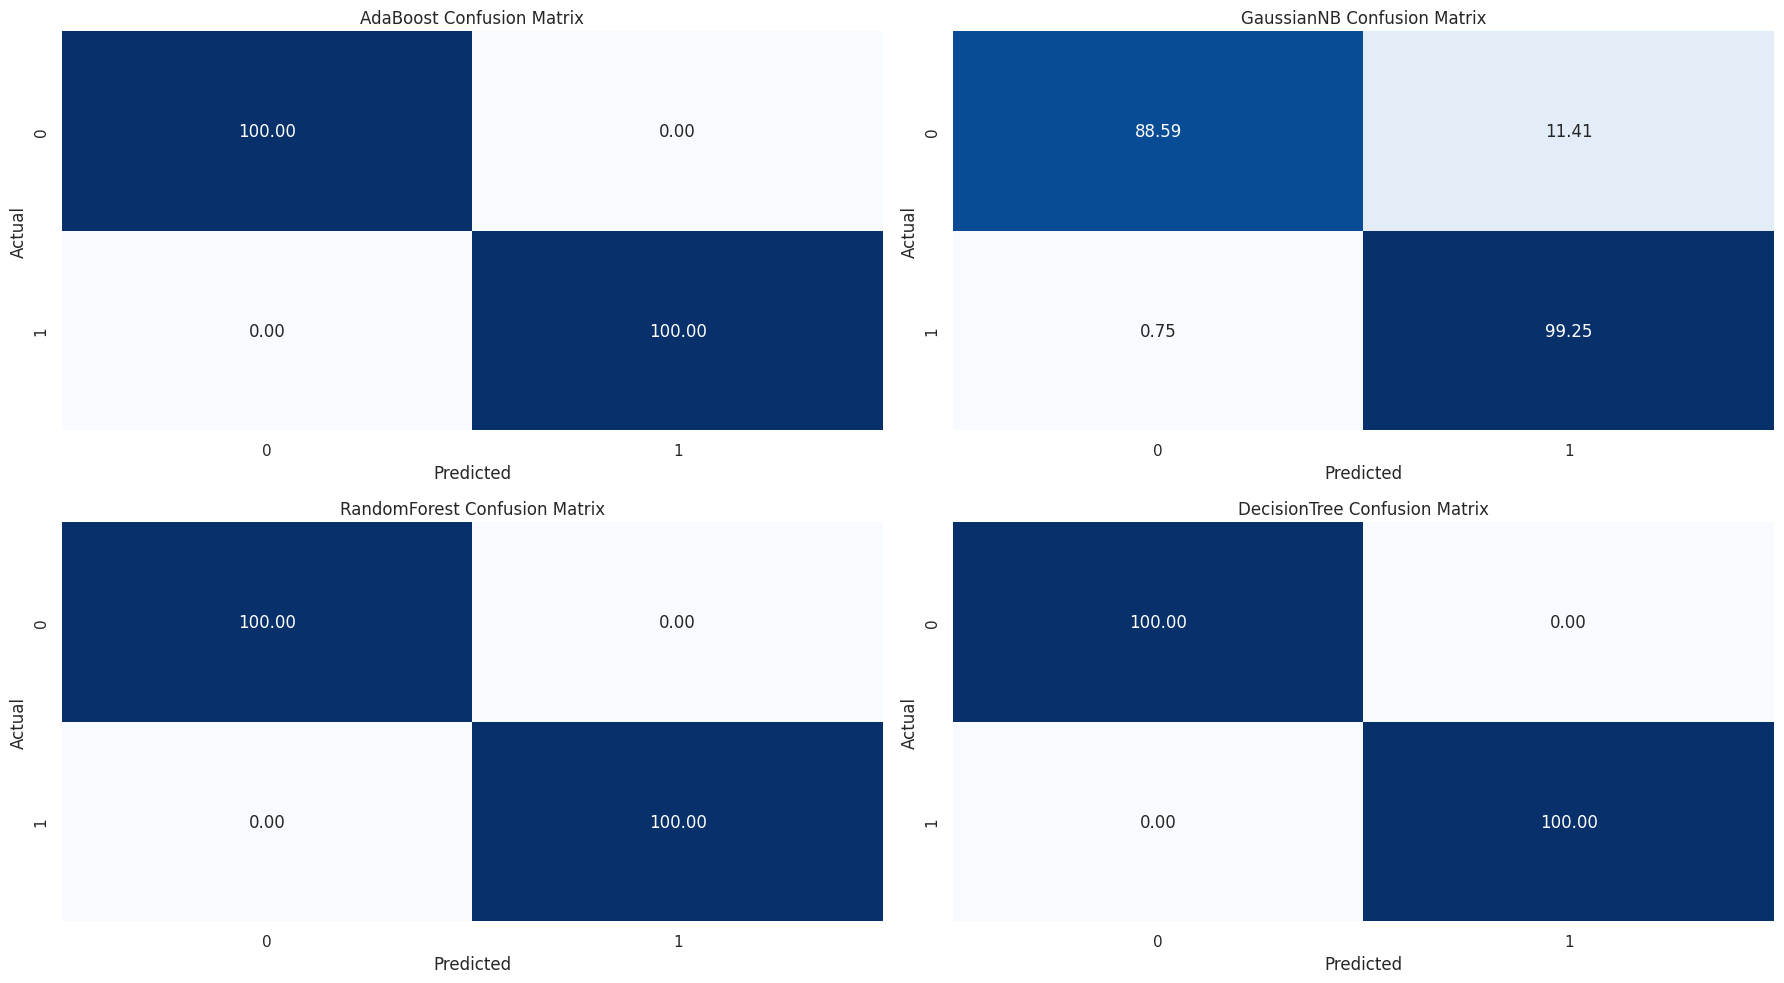

In [40]:

# Assuming other_models contains the models to be evaluated
results = {}  # Dictionary to store the results for each model

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.ravel()

# Iterate over the models
for idx, (name, model) in enumerate(other_models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Normalize the confusion matrix by the total number of samples
    cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis] * 100  # Convert to percentage

    # Precision, Recall, and Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Store the results in the dictionary
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'confusion_matrix_absolute': cm,
        'confusion_matrix_percentage': cm_percentage
    }
    

    # Plotting the confusion matrix
    sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', ax=axes[idx], 
                cbar=False)  # Disabling the colorbar
    
    # Setting the title and labels
    axes[idx].set_title(f'{name} Confusion Matrix')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')
    

plt.tight_layout()
plt.show()


In [41]:
# Print the results in a formatted way
print("\nModel Evaluation Results:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"  {'Accuracy:':<15} {metrics['accuracy']:.2f}")
    print(f"  {'Precision:':<15} {metrics['precision']:.2f}")
    print(f"  {'Recall:':<15} {metrics['recall']:.2f}")
    
    print(f"  {'Confusion Matrix (Absolute):':<25}\n{metrics['confusion_matrix_absolute']}")
    print(f"  {'Confusion Matrix (Percentage):':<25}\n{metrics['confusion_matrix_percentage']}")



Model Evaluation Results:

AdaBoost:
  Accuracy:       1.00
  Precision:      1.00
  Recall:         1.00
  Confusion Matrix (Absolute):
[[22411     0]
 [    0  7323]]
  Confusion Matrix (Percentage):
[[100.   0.]
 [  0. 100.]]

GaussianNB:
  Accuracy:       0.91
  Precision:      0.74
  Recall:         0.99
  Confusion Matrix (Absolute):
[[19853  2558]
 [   55  7268]]
  Confusion Matrix (Percentage):
[[88.58596225 11.41403775]
 [ 0.75105831 99.24894169]]

RandomForest:
  Accuracy:       1.00
  Precision:      1.00
  Recall:         1.00
  Confusion Matrix (Absolute):
[[22411     0]
 [    0  7323]]
  Confusion Matrix (Percentage):
[[100.   0.]
 [  0. 100.]]

DecisionTree:
  Accuracy:       1.00
  Precision:      1.00
  Recall:         1.00
  Confusion Matrix (Absolute):
[[22411     0]
 [    0  7323]]
  Confusion Matrix (Percentage):
[[100.   0.]
 [  0. 100.]]


## 3.3 Linear SVM

In [42]:
# Initialize and train LinearSVC (SVM) model
linear_svm = LinearSVC(max_iter=10000, random_state=42)
linear_svm.fit(X_train, y_train)

# Predict using the trained model
y_pred_svm = linear_svm.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
conf_matrix_percentage = conf_matrix / len(y_test) * 100  # Convert to percentage

# Store the results in a dictionary
svm_results = {
    'LinearSVC': {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'confusion_matrix_absolute': conf_matrix,
        'confusion_matrix_percentage': conf_matrix_percentage
    }
}

# Print the formatted results
print("\nModel Evaluation Results:")
for model_name, metrics in svm_results.items():
    print(f"\n{model_name}:")
    print(f"  {'Accuracy:':<15} {metrics['accuracy']:.2f}")
    print(f"  {'Precision:':<15} {metrics['precision']:.2f}")
    print(f"  {'Recall:':<15} {metrics['recall']:.2f}")
    
    print(f"  {'Confusion Matrix (Absolute):':<25}\n{metrics['confusion_matrix_absolute']}")
    print(f"  {'Confusion Matrix (Percentage):':<25}\n{metrics['confusion_matrix_percentage']}")


Model Evaluation Results:

LinearSVC:
  Accuracy:       0.68
  Precision:      0.29
  Recall:         0.20
  Confusion Matrix (Absolute):
[[18798  3613]
 [ 5879  1444]]
  Confusion Matrix (Percentage):
[[63.22055559 12.15107285]
 [19.77197821  4.85639335]]


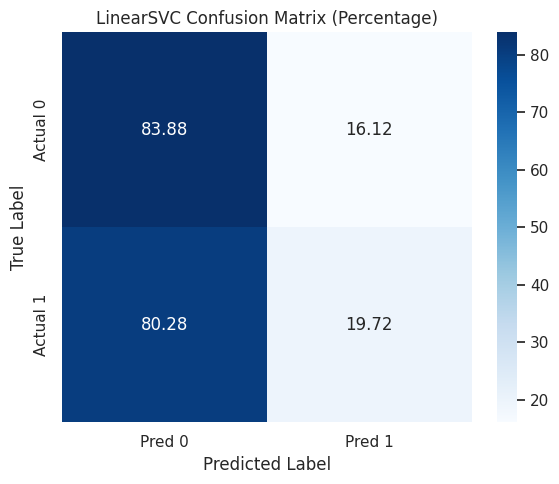

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Provided data
cm_absolute = np.array([[18798, 3613],
                        [5879, 1444]])

# Convert to percentage (row-wise normalization)
cm_percentage = cm_absolute / cm_absolute.sum(axis=1, keepdims=True) * 100

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])

plt.title("LinearSVC Confusion Matrix (Percentage)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Define the pipeline: Scaling → Feature Selection → Linear SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling the features
    ('select', SelectKBest(score_func=f_classif, k=20)),  # Feature selection, change k as needed
    ('svm', LinearSVC(max_iter=10000, random_state=42))  # Linear SVM
])

# Fit the pipeline with training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percentage = conf_matrix / len(y_test) * 100  # Convert to percentage

# Store the results
pipeline_results = {
    'LinearSVC with Pipeline': {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'confusion_matrix_absolute': conf_matrix,
        'confusion_matrix_percentage': conf_matrix_percentage
    }
}

# Print the formatted results
print("\nPipeline Model Evaluation Results:")
for model_name, metrics in pipeline_results.items():
    print(f"\n{model_name}:")
    print(f"  {'Accuracy:':<15} {metrics['accuracy']:.2f}")
    print(f"  {'Precision:':<15} {metrics['precision']:.2f}")
    print(f"  {'Recall:':<15} {metrics['recall']:.2f}")
    
    print(f"  {'Confusion Matrix (Absolute):':<25}\n{metrics['confusion_matrix_absolute']}")
    print(f"  {'Confusion Matrix (Percentage):':<25}\n{metrics['confusion_matrix_percentage']}")



Pipeline Model Evaluation Results:

LinearSVC with Pipeline:
  Accuracy:       0.88
  Precision:      0.89
  Recall:         0.56
  Confusion Matrix (Absolute):
[[21917   494]
 [ 3188  4135]]
  Confusion Matrix (Percentage):
[[73.71023071  1.66139773]
 [10.7217327  13.90663886]]


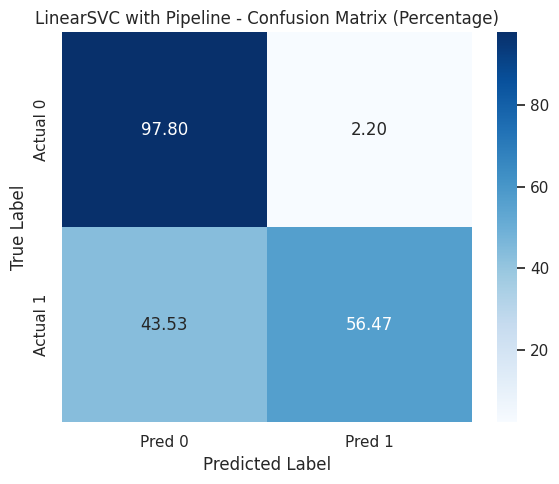

In [52]:
# Provided confusion matrix (absolute)
cm_absolute = np.array([[21917,  494],
                        [3188,  4135]])

# Convert to percentage (row-wise normalization)
cm_percentage = cm_absolute / cm_absolute.sum(axis=1, keepdims=True) * 100

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title("LinearSVC with Pipeline - Confusion Matrix (Percentage)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


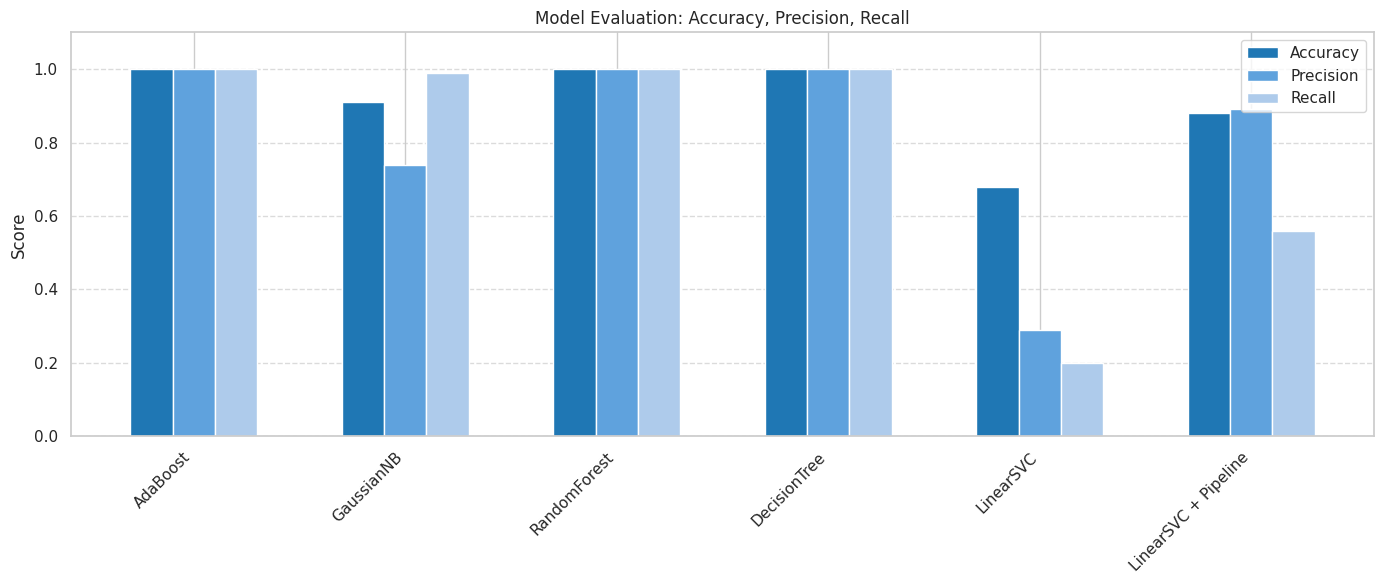

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding metrics
model_names = [
    'AdaBoost', 'GaussianNB', 'RandomForest', 'DecisionTree',
    'LinearSVC', 'LinearSVC + Pipeline'
]

accuracies = [1.00, 0.91, 1.00, 1.00, 0.68, 0.88]
precisions = [1.00, 0.74, 1.00, 1.00, 0.29, 0.89]
recalls    = [1.00, 0.99, 1.00, 1.00, 0.20, 0.56]

# Set the width of each bar
bar_width = 0.2
x = np.arange(len(model_names))

# Create the plot
plt.figure(figsize=(14, 6))
plt.bar(x - bar_width, accuracies, width=bar_width, label='Accuracy', color='#1f77b4')     # dark blue
plt.bar(x, precisions, width=bar_width, label='Precision', color='#5fa2dd')                # medium blue
plt.bar(x + bar_width, recalls, width=bar_width, label='Recall', color='#aecbeb')          # light blue

# Labels and formatting
plt.xticks(x, model_names, rotation=45, ha='right')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.title('Model Evaluation: Accuracy, Precision, Recall')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## We need to train the non linear SVM to get better accuracy but it takes a lot of time...

# 4.0 Our Approach For Feature Engineering

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 54 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   loan_limit                    148670 non-null  int64  
 1   approv_in_adv                 148670 non-null  int64  
 2   credit_worthiness             148670 non-null  int64  
 3   open_credit                   148670 non-null  int64  
 4   business_or_commercial        148670 non-null  int64  
 5   loan_amount                   148670 non-null  int64  
 6   rate_of_interest              148670 non-null  float64
 7   interest_rate_spread          148670 non-null  float64
 8   upfront_charges               148670 non-null  float64
 9   term                          148670 non-null  float64
 10  neg_ammortization             148670 non-null  int64  
 11  interest_only                 148670 non-null  int64  
 12  lump_sum_payment              148670 non-nul

### Now we need to get feature importance from Random forest

In [55]:
# Assuming you already have your dataset loaded in `df`
X = df.drop(['status'], axis=1)  # Features (all columns except 'status')
y = df['status']  # Target variable ('status')


In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [57]:
# Get feature importance
importances = rf.feature_importances_

# Create a DataFrame with feature names and their importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Show the top features
print(feature_importance.head(10))  # Top 10 features


                 Feature  Importance
6       rate_of_interest    0.321992
7   interest_rate_spread    0.212173
8        upfront_charges    0.151848
34      credit_type_EQUI    0.078816
42  high_interest_rate_0    0.067985
43  high_interest_rate_1    0.060197
13        property_value    0.022424
20                   ltv    0.017905
22                 dtir1    0.014883
16                income    0.006376


In [73]:
# Feature Importance Columns
features = ['rate_of_interest', 'interest_rate_spread', 'upfront_charges', 'credit_type_EQUI', 
            'high_interest_rate_0', 'high_interest_rate_1', 'property_value', 'ltv', 
            'dtir1', 'income']

# Extract features and target variable
X = df[features]
y = df['status']  # Assuming 'status' is your target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Models dictionary (only the 5 specified)
models = {
    'AdaBoost': AdaBoostClassifier(),
    'GaussianNB': GaussianNB(),
    'RandomForest': RandomForestClassifier(), 
    'DecisionTree': DecisionTreeClassifier(),
    'LinearSVC': CalibratedClassifierCV(LinearSVC(max_iter=10000, random_state=42))
}


In [75]:
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)
    cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100

    results[name] = {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'conf_matrix': cm,
        'conf_matrix_percent': cm_percent
    }


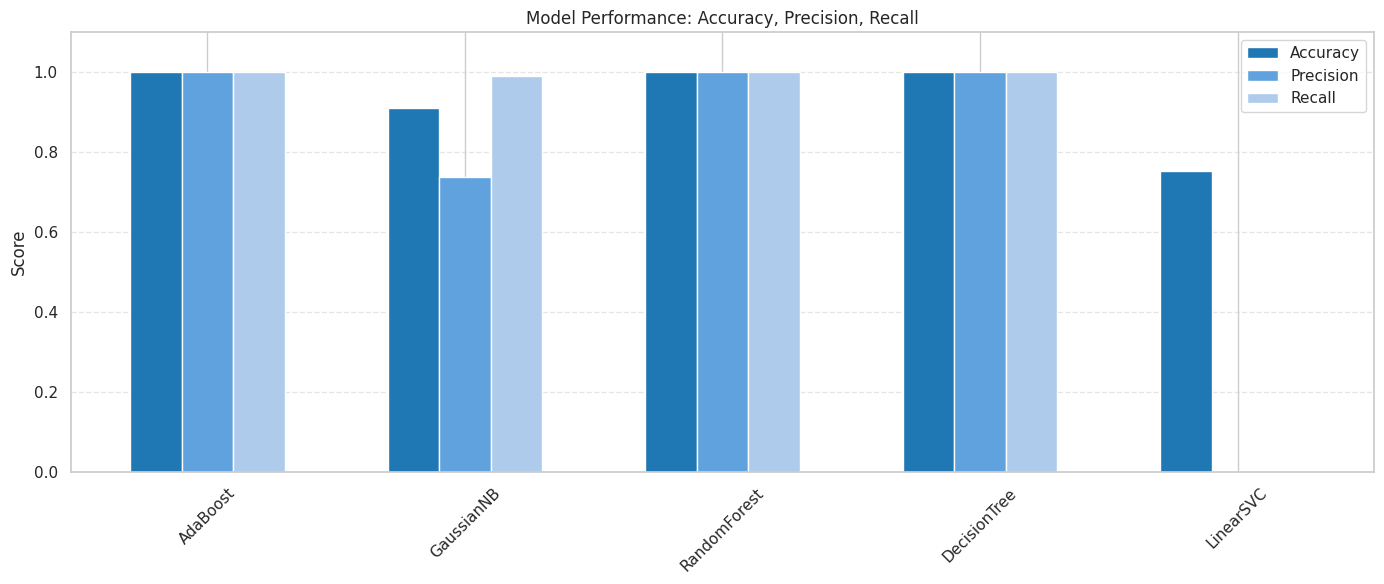

In [76]:
# Define metrics and their corresponding colors
metrics = ['accuracy', 'precision', 'recall']
colors = ['#1f77b4', '#5fa2dd', '#aecbeb']
bar_width = 0.2
x = np.arange(len(models))

# Plotting
plt.figure(figsize=(14, 6))
for i, (metric, color) in enumerate(zip(metrics, colors)):
    plt.bar(x + i * bar_width,
            [results[m][metric] for m in models],
            width=bar_width,
            label=metric.capitalize(),
            color=color)

plt.xticks(x + bar_width, models.keys(), rotation=45)
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.title("Model Performance: Accuracy, Precision, Recall")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

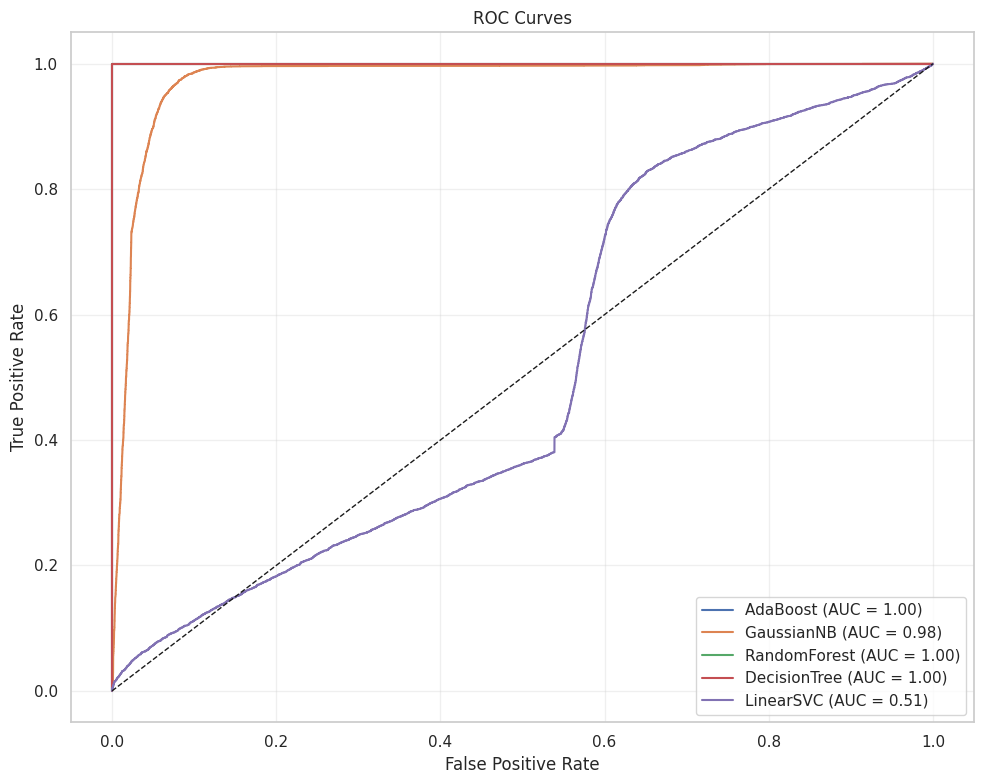

In [77]:
# Plot ROC Curves
plt.figure(figsize=(10, 8))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        continue
    
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 5.0 Conclusion

### Conclusion

The paper demonstrates that **machine learning algorithms**, particularly **ensemble methods**, offer a highly effective solution for the **bank loan approval prediction** problem. Leveraging a large and diverse dataset of **148,670 applications** with **37 features**, the study systematically evaluates several algorithms, including:

- **AdaBoosting**
- **Random Forest**
- **Decision Tree**
- **SVM**
- **GaussianNB**

The results reveal that ensemble techniques like **AdaBoosting (99.99% accuracy)** and **Random Forest (99.98% accuracy)** **far surpass** traditional models such as **GaussianNB (77.10% accuracy)**.

### Key Takeaways

- **Ensemble learning methods** are exceptionally **robust and accurate** for complex, high-dimensional financial prediction tasks, significantly outperforming single-model approaches.
- Machine learning-based loan prediction models can **enhance risk management** and **decision-making efficiency** in banking, enabling **faster**, more **consistent**, and **data-driven** loan approvals.
- Adoption of such models can help financial institutions **reduce default rates** and **optimize lending processes**, benefiting both banks and customers by **minimizing risk** and **improving service delivery**.

### Final Summary

This research confirms that **advanced machine learning models**, especially **ensemble algorithms**, can **revolutionize the bank loan approval process**. They provide **highly accurate**, **scalable**, and **reliable predictions**, supporting better **credit risk assessment** and **operational efficiency** in the financial sector.
